<a href="https://colab.research.google.com/github/Jatin-Ydv/Deep-Learning/blob/main/Copy_of_CybersecurityOfAutonomousVehicles_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies


In [ ]:
import xgboost as xgb
xgb.__version__

'2.0.3'

In [ ]:
!pip install catboost

In [ ]:
import catboost as cb
import lightgbm as lgb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [ ]:
dataset=pd.read_csv('/content/CICIDS2017_sample_km.csv')

In [ ]:
dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
dataset.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26800 entries, 0 to 26799
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                26800 non-null  float64
 1   Total Fwd Packets            26800 non-null  float64
 2   Total Backward Packets       26800 non-null  float64
 3   Total Length of Fwd Packets  26800 non-null  float64
 4   Total Length of Bwd Packets  26800 non-null  float64
 5   Fwd Packet Length Max        26800 non-null  float64
 6   Fwd Packet Length Min        26800 non-null  float64
 7   Fwd Packet Length Mean       26800 non-null  float64
 8   Fwd Packet Length Std        26800 non-null  float64
 9   Bwd Packet Length Max        26800 non-null  float64
 10  Bwd Packet Length Min        26800 non-null  float64
 11  Bwd Packet Length Mean       26800 non-null  float64
 12  Bwd Packet Length Std        26800 non-null  float64
 13  Flow Bytes/s    

In [ ]:
dataset.Label.unique()

array([0, 3, 5, 2, 1, 4, 6])

In [ ]:
dataset.Label.value_counts()

Label
0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: count, dtype: int64

In [ ]:
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Flow Duration,26800.0,0.109687,0.262082,1.083333e-07,1.441667e-06,4.154041e-04,4.361629e-02,0.999997
Total Fwd Packets,26800.0,0.000030,0.000401,0.000000e+00,4.550460e-06,4.550460e-06,1.365138e-05,0.042765
Total Backward Packets,26800.0,0.000024,0.000351,0.000000e+00,3.425573e-06,6.851145e-06,1.027672e-05,0.042121
Total Length of Fwd Packets,26800.0,0.000101,0.002408,0.000000e+00,1.550388e-07,4.186047e-06,1.364341e-05,0.222179
Total Length of Bwd Packets,26800.0,0.000009,0.000269,0.000000e+00,0.000000e+00,1.525662e-07,5.126225e-07,0.041803
...,...,...,...,...,...,...,...,...
Idle Mean,26800.0,0.058790,0.183058,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.998518
Idle Std,26800.0,0.005732,0.055507,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.863459
Idle Max,26800.0,0.061566,0.188930,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.998518
Idle Min,26800.0,0.055885,0.180817,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.998518


In [ ]:
dataset.isna().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 78, dtype: int64

#Preprocessing

In [ ]:
x=dataset.drop(['Label'],axis=1)
y=dataset['Label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,shuffle=True,random_state=0)

In [ ]:
pd.Series(y_train).value_counts()

Label
0    14580
3     2433
6     1744
1     1573
5     1004
2       77
4       29
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [ ]:
x_train,y_train=smote.fit_resample(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
pd.Series(y_train).value_counts()

Label
0    14580
3     2433
6     1744
1     1573
5     1004
4     1000
2     1000
Name: count, dtype: int64

In [ ]:
print ('x_train shape:', x_train.shape)
print ('y_train shape:', y_train.shape)
print ('x_test shape:', x_test.shape)
print ('y_test shape:', y_test.shape)

x_train shape: (23334, 77)
y_train shape: (23334,)
x_test shape: (5360, 77)
y_test shape: (5360,)


In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.9 MB/s eta 0:00:00


In [ ]:

paramsxgb={'n_estimators': 118, 'learning_rate': 0.2883807528123632, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.7118909457032421, 'colsample_bytree': 0.897817264649498, 'gamma': 0.10954622044822832, 'lambda': 0.23894424338682882, 'alpha': 0.9272506929926865, 'scale_pos_weight': 1.9559134969698222}

In [ ]:
xbc=xgb.XGBClassifier(**paramsxgb)
xbc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=0.9272506929926865, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.897817264649498, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.10954622044822832,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.23894424338682882,
              learning_rate=0.2883807528123632, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=118, n_jobs=None, ...)

In [ ]:
y_pred=xbc.predict(x_test)
import sklearn
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred,average='weighted'))

0.9979179163735156


In [ ]:
paramscb={'iterations': 266, 'learning_rate': 0.19594539766327876, 'depth': 8, 'l2_leaf_reg': 3.9812770963437245, 'border_count': 89, 'bagging_temperature': 0.7435676333066552}

In [ ]:
cbc=cb.CatBoostClassifier(**paramscb)
cbc.fit(x_train,y_train)

0:	learn: 1.1763128	total: 451ms	remaining: 1m 59s
1:	learn: 0.8918445	total: 932ms	remaining: 2m 3s
2:	learn: 0.7270211	total: 1.79s	remaining: 2m 37s
3:	learn: 0.5984650	total: 2.07s	remaining: 2m 15s
4:	learn: 0.4916597	total: 2.34s	remaining: 2m 1s
5:	learn: 0.4224903	total: 2.61s	remaining: 1m 53s
6:	learn: 0.3652194	total: 2.87s	remaining: 1m 46s
7:	learn: 0.3194726	total: 3.13s	remaining: 1m 41s
8:	learn: 0.2872986	total: 3.4s	remaining: 1m 37s
9:	learn: 0.2584003	total: 3.73s	remaining: 1m 35s
10:	learn: 0.2252384	total: 4.17s	remaining: 1m 36s
11:	learn: 0.2024400	total: 4.7s	remaining: 1m 39s
12:	learn: 0.1811764	total: 5.22s	remaining: 1m 41s
13:	learn: 0.1654611	total: 5.69s	remaining: 1m 42s
14:	learn: 0.1533903	total: 6.1s	remaining: 1m 42s
15:	learn: 0.1413385	total: 6.63s	remaining: 1m 43s
16:	learn: 0.1276590	total: 7.16s	remaining: 1m 44s
17:	learn: 0.1181556	total: 7.66s	remaining: 1m 45s
18:	learn: 0.1105919	total: 7.94s	remaining: 1m 43s
19:	learn: 0.1038711	total:

In [ ]:
y_pred_cbc=cbc.predict(x_test)
print(f1_score(y_test,y_pred_cbc,average='weighted'))

0.9977313267920159


In [ ]:
paramslgbm={'num_leaves': 64, 'learning_rate': 0.14420586855104273, 'max_depth': 5, 'min_child_samples': 12, 'subsample': 0.7931807030229832, 'colsample_bytree': 0.9660911614345752, 'reg_alpha': 0.5537359038198849, 'reg_lambda': 0.890484690532437, 'scale_pos_weight': 1.3028280967705916}

In [ ]:
lbc=lgb.LGBMClassifier(**paramslgbm)
lbc.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14073
[LightGBM] [Info] Number of data points in the train set: 23334, number of used features: 63
[LightGBM] [Info] Start training from score -0.470261
[LightGBM] [Info] Start training from score -2.696927
[LightGBM] [Info] Start training from score -3.149912
[LightGBM] [Info] Start training from score -2.260786
[LightGBM] [Info] Start training from score -3.149912
[LightGBM] [Info] Start training from score -3.145920
[LightGBM] [Info] Start training from score -2.593730
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier(colsample_bytree=0.9660911614345752,
               learning_rate=0.14420586855104273, max_depth=5,
               min_child_samples=12, num_leaves=64,
               reg_alpha=0.5537359038198849, reg_lambda=0.890484690532437,
               scale_pos_weight=1.3028280967705916,
               subsample=0.7931807030229832)

In [ ]:
y_pred_lgbm=lbc.predict(x_test)
print(f1_score(y_test,y_pred_lgbm,average='weighted'))

0.9979186898725128


#**OPTIMISING THE HYERPARAMETERS WITH OPTUNA :**


### **XGBOOST HYPERPARAMTER TUNING:**

In [ ]:
import optuna
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score
def objective(trial):
    # Define the hyperparameter search space
    param = {
          'objective': 'multi:softmax',  # Multi-class objective
        'num_class': 7,  # Number of classes
        'eval_metric': 'mlogloss',
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'lambda': trial.suggest_float('lambda', 0.0, 5.0),
        'alpha': trial.suggest_float('alpha', 0.0, 5.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 2.0)
    }

    # Train the model
    model = xgb.XGBClassifier(**param)
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred,average='weighted')

    return f1

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

# Get the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

[I 2024-06-05 11:28:09,869] A new study created in memory with name: no-name-0a0e08ae-dfb5-4c34-bef5-49d147d18967
[I 2024-06-05 11:28:16,178] Trial 0 finished with value: 0.995863586749084 and parameters: {'n_estimators': 291, 'learning_rate': 0.11011895289604993, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.9311954486160597, 'colsample_bytree': 0.5828795470513233, 'gamma': 4.8998094416841065, 'lambda': 0.7609727671589395, 'alpha': 1.5461086237553596, 'scale_pos_weight': 1.3049649793631881}. Best is trial 0 with value: 0.995863586749084.
[I 2024-06-05 11:28:24,869] Trial 1 finished with value: 0.9908208082667834 and parameters: {'n_estimators': 196, 'learning_rate': 0.02969696012964918, 'max_depth': 4, 'min_child_weight': 9, 'subsample': 0.643026556536836, 'colsample_bytree': 0.8677311897290412, 'gamma': 2.769931113091703, 'lambda': 4.401845642530157, 'alpha': 1.0589183119697199, 'scale_pos_weight': 0.9787501606914966}. Best is trial 0 with value: 0.995863586749084.
[I 2024-06

Best hyperparameters:  {'n_estimators': 118, 'learning_rate': 0.2883807528123632, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.7118909457032421, 'colsample_bytree': 0.897817264649498, 'gamma': 0.10954622044822832, 'lambda': 0.23894424338682882, 'alpha': 0.9272506929926865, 'scale_pos_weight': 1.9559134969698222}
Best F1 Score:  0.9977321601774839


### **LIGHTGBM HYPERPARAMTER TUNING:**

In [ ]:
def objective(trial):
    # Define the hyperparameter search space
    param = {
        'objective': 'multiclass',
        'num_class': 7,
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 2.0)
    }

    # Train the model
    model = lgb.LGBMClassifier(**param)
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' to average F1 score across all classes

    return f1

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

# Get the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

[I 2024-06-05 11:53:44,837] A new study created in memory with name: no-name-2a060071-f250-4169-a9e0-e692ab02df1f
[I 2024-06-05 11:53:52,748] Trial 0 finished with value: 0.9962390025614706 and parameters: {'num_leaves': 119, 'learning_rate': 0.09095119846399974, 'max_depth': 14, 'min_child_samples': 1, 'subsample': 0.6094769680806147, 'colsample_bytree': 0.8694814939151945, 'reg_alpha': 0.0030158590911366634, 'reg_lambda': 4.0083659828690985, 'scale_pos_weight': 0.8222876782515571}. Best is trial 0 with value: 0.9962390025614706.
[I 2024-06-05 11:53:55,096] Trial 1 finished with value: 0.9971746578047879 and parameters: {'num_leaves': 132, 'learning_rate': 0.25502471145444366, 'max_depth': 6, 'min_child_samples': 20, 'subsample': 0.6233891265134607, 'colsample_bytree': 0.8867789208657741, 'reg_alpha': 2.1026384113233503, 'reg_lambda': 1.8533358016031536, 'scale_pos_weight': 1.3920912675901371}. Best is trial 1 with value: 0.9971746578047879.
[I 2024-06-05 11:53:57,439] Trial 2 finishe

Best hyperparameters:  {'num_leaves': 64, 'learning_rate': 0.14420586855104273, 'max_depth': 5, 'min_child_samples': 12, 'subsample': 0.7931807030229832, 'colsample_bytree': 0.9660911614345752, 'reg_alpha': 0.5537359038198849, 'reg_lambda': 0.890484690532437, 'scale_pos_weight': 1.3028280967705916}
Best F1 Score:  0.9979186898725128


### **CATBOOST HYPERPARAMTER TUNING:**

In [ ]:
def objective(trial):
    # Define the hyperparameter search space
    param = {
        'objective': 'MultiClass',
        'eval_metric': 'MultiClass',
        'iterations': trial.suggest_int('iterations', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.0, 5.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0)
    }

    # Train the model
    model = cb.CatBoostClassifier(**param)
    model.fit(x_train, y_train, verbose=True)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' to average F1 score across all classes

    return f1

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

# Get the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best F1 Score: ", study.best_value)

[I 2024-06-05 12:14:06,474] A new study created in memory with name: no-name-0f6b69a5-b842-4874-9e08-6a413be7e32a


0:	learn: 1.5117127	total: 110ms	remaining: 31.7s
1:	learn: 1.3070563	total: 165ms	remaining: 23.7s
2:	learn: 1.1480376	total: 216ms	remaining: 20.6s
3:	learn: 0.9859982	total: 297ms	remaining: 21.1s
4:	learn: 0.8923001	total: 378ms	remaining: 21.5s
5:	learn: 0.8301026	total: 455ms	remaining: 21.4s
6:	learn: 0.7570516	total: 547ms	remaining: 22s
7:	learn: 0.6934094	total: 664ms	remaining: 23.3s
8:	learn: 0.6420262	total: 756ms	remaining: 23.5s
9:	learn: 0.6117006	total: 847ms	remaining: 23.6s
10:	learn: 0.5865933	total: 955ms	remaining: 24.1s
11:	learn: 0.5504952	total: 1.06s	remaining: 24.4s
12:	learn: 0.5219121	total: 1.17s	remaining: 24.8s
13:	learn: 0.4959797	total: 1.26s	remaining: 24.7s
14:	learn: 0.4699934	total: 1.38s	remaining: 25.2s
15:	learn: 0.4516581	total: 1.46s	remaining: 24.9s
16:	learn: 0.4295690	total: 1.56s	remaining: 24.9s
17:	learn: 0.4129055	total: 1.65s	remaining: 24.8s
18:	learn: 0.3905644	total: 1.77s	remaining: 25.1s
19:	learn: 0.3773903	total: 1.86s	remaining

[I 2024-06-05 12:14:18,985] Trial 0 finished with value: 0.9943968078712105 and parameters: {'iterations': 289, 'learning_rate': 0.15357891887618436, 'depth': 3, 'l2_leaf_reg': 3.5553611125202442, 'border_count': 229, 'bagging_temperature': 0.18681626934983298}. Best is trial 0 with value: 0.9943968078712105.


287:	learn: 0.0372358	total: 12.2s	remaining: 42.2ms
288:	learn: 0.0369985	total: 12.2s	remaining: 0us
0:	learn: 1.8485996	total: 419ms	remaining: 1m 33s
1:	learn: 1.7595982	total: 839ms	remaining: 1m 32s
2:	learn: 1.6790407	total: 1.25s	remaining: 1m 31s
3:	learn: 1.6093206	total: 1.73s	remaining: 1m 34s
4:	learn: 1.5446076	total: 2.47s	remaining: 1m 47s
5:	learn: 1.4841079	total: 3.18s	remaining: 1m 54s
6:	learn: 1.4279578	total: 3.91s	remaining: 2m
7:	learn: 1.3772892	total: 4.7s	remaining: 2m 6s
8:	learn: 1.3302646	total: 5.19s	remaining: 2m 3s
9:	learn: 1.2858262	total: 5.61s	remaining: 1m 59s
10:	learn: 1.2433000	total: 6.03s	remaining: 1m 56s
11:	learn: 1.2039109	total: 6.44s	remaining: 1m 53s
12:	learn: 1.1669718	total: 6.86s	remaining: 1m 50s
13:	learn: 1.1330847	total: 7.28s	remaining: 1m 48s
14:	learn: 1.1003913	total: 7.7s	remaining: 1m 46s
15:	learn: 1.0689974	total: 8.12s	remaining: 1m 45s
16:	learn: 1.0377882	total: 8.53s	remaining: 1m 43s
17:	learn: 1.0095602	total: 8.9

[I 2024-06-05 12:16:06,336] Trial 1 finished with value: 0.9921391101773708 and parameters: {'iterations': 223, 'learning_rate': 0.021274341983943693, 'depth': 10, 'l2_leaf_reg': 3.6922431990007847, 'border_count': 70, 'bagging_temperature': 0.7330886510085239}. Best is trial 0 with value: 0.9943968078712105.


222:	learn: 0.0672110	total: 1m 47s	remaining: 0us
0:	learn: 1.8648654	total: 47ms	remaining: 12s
1:	learn: 1.7957591	total: 78.1ms	remaining: 9.95s
2:	learn: 1.7353984	total: 108ms	remaining: 9.17s
3:	learn: 1.6806932	total: 138ms	remaining: 8.74s
4:	learn: 1.6310075	total: 171ms	remaining: 8.63s
5:	learn: 1.5867649	total: 200ms	remaining: 8.38s
6:	learn: 1.5448834	total: 230ms	remaining: 8.22s
7:	learn: 1.5020968	total: 260ms	remaining: 8.11s
8:	learn: 1.4668261	total: 291ms	remaining: 8.01s
9:	learn: 1.4305830	total: 318ms	remaining: 7.87s
10:	learn: 1.4000254	total: 350ms	remaining: 7.83s
11:	learn: 1.3707752	total: 378ms	remaining: 7.72s
12:	learn: 1.3401027	total: 406ms	remaining: 7.63s
13:	learn: 1.3135060	total: 438ms	remaining: 7.6s
14:	learn: 1.2862064	total: 470ms	remaining: 7.58s
15:	learn: 1.2594284	total: 499ms	remaining: 7.52s
16:	learn: 1.2405433	total: 530ms	remaining: 7.48s
17:	learn: 1.2163313	total: 558ms	remaining: 7.41s
18:	learn: 1.1961725	total: 592ms	remaining:

[I 2024-06-05 12:16:16,096] Trial 2 finished with value: 0.9695113555218442 and parameters: {'iterations': 257, 'learning_rate': 0.025091342804086134, 'depth': 3, 'l2_leaf_reg': 2.29582197758761, 'border_count': 78, 'bagging_temperature': 0.36774942724692594}. Best is trial 0 with value: 0.9943968078712105.


253:	learn: 0.2067229	total: 9.47s	remaining: 112ms
254:	learn: 0.2057606	total: 9.51s	remaining: 74.6ms
255:	learn: 0.2049702	total: 9.54s	remaining: 37.3ms
256:	learn: 0.2037858	total: 9.57s	remaining: 0us
0:	learn: 1.5386463	total: 72.8ms	remaining: 21.5s
1:	learn: 1.3160340	total: 130ms	remaining: 19.1s
2:	learn: 1.1638225	total: 193ms	remaining: 18.8s
3:	learn: 1.0242768	total: 256ms	remaining: 18.7s
4:	learn: 0.9309696	total: 317ms	remaining: 18.4s
5:	learn: 0.8304285	total: 378ms	remaining: 18.3s
6:	learn: 0.7559329	total: 435ms	remaining: 18s
7:	learn: 0.6793653	total: 501ms	remaining: 18s
8:	learn: 0.6299315	total: 565ms	remaining: 18s
9:	learn: 0.5860119	total: 626ms	remaining: 17.9s
10:	learn: 0.5335058	total: 709ms	remaining: 18.4s
11:	learn: 0.5012779	total: 772ms	remaining: 18.3s
12:	learn: 0.4805661	total: 841ms	remaining: 18.3s
13:	learn: 0.4465509	total: 904ms	remaining: 18.2s
14:	learn: 0.4140522	total: 968ms	remaining: 18.1s
15:	learn: 0.3862571	total: 1.04s	remainin

[I 2024-06-05 12:16:35,254] Trial 3 finished with value: 0.9960563207442161 and parameters: {'iterations': 296, 'learning_rate': 0.114971089647453, 'depth': 5, 'l2_leaf_reg': 1.95640196262719, 'border_count': 198, 'bagging_temperature': 0.7510597760714817}. Best is trial 3 with value: 0.9960563207442161.


294:	learn: 0.0179689	total: 18.9s	remaining: 64ms
295:	learn: 0.0179202	total: 18.9s	remaining: 0us
0:	learn: 1.3132265	total: 92.7ms	remaining: 14.4s
1:	learn: 1.0716810	total: 155ms	remaining: 11.9s
2:	learn: 0.8719243	total: 254ms	remaining: 12.9s
3:	learn: 0.7475978	total: 368ms	remaining: 14s
4:	learn: 0.6391669	total: 495ms	remaining: 14.9s
5:	learn: 0.5637758	total: 594ms	remaining: 14.8s
6:	learn: 0.4950851	total: 715ms	remaining: 15.2s
7:	learn: 0.4271235	total: 858ms	remaining: 15.9s
8:	learn: 0.3811669	total: 991ms	remaining: 16.2s
9:	learn: 0.3450585	total: 1.1s	remaining: 16.1s
10:	learn: 0.3122947	total: 1.24s	remaining: 16.4s
11:	learn: 0.2903970	total: 1.35s	remaining: 16.2s
12:	learn: 0.2630424	total: 1.48s	remaining: 16.2s
13:	learn: 0.2454592	total: 1.59s	remaining: 16.1s
14:	learn: 0.2259417	total: 1.7s	remaining: 16s
15:	learn: 0.2168538	total: 1.81s	remaining: 15.9s
16:	learn: 0.2085363	total: 1.92s	remaining: 15.7s
17:	learn: 0.1916278	total: 2.03s	remaining: 15

[I 2024-06-05 12:16:46,435] Trial 4 finished with value: 0.9966148332017212 and parameters: {'iterations': 156, 'learning_rate': 0.1921717076795208, 'depth': 5, 'l2_leaf_reg': 1.1530673432639387, 'border_count': 216, 'bagging_temperature': 0.25479380714239097}. Best is trial 4 with value: 0.9966148332017212.


152:	learn: 0.0169689	total: 10.8s	remaining: 213ms
153:	learn: 0.0168312	total: 10.9s	remaining: 142ms
154:	learn: 0.0166833	total: 11s	remaining: 70.7ms
155:	learn: 0.0166095	total: 11s	remaining: 0us
0:	learn: 1.4100962	total: 70.1ms	remaining: 10.9s
1:	learn: 1.1609269	total: 129ms	remaining: 10s
2:	learn: 0.9693063	total: 191ms	remaining: 9.81s
3:	learn: 0.8423772	total: 259ms	remaining: 9.92s
4:	learn: 0.7421230	total: 332ms	remaining: 10.1s
5:	learn: 0.6615207	total: 390ms	remaining: 9.82s
6:	learn: 0.5874713	total: 452ms	remaining: 9.68s
7:	learn: 0.5338148	total: 519ms	remaining: 9.67s
8:	learn: 0.4864214	total: 582ms	remaining: 9.57s
9:	learn: 0.4465994	total: 648ms	remaining: 9.53s
10:	learn: 0.4060247	total: 711ms	remaining: 9.44s
11:	learn: 0.3764858	total: 772ms	remaining: 9.33s
12:	learn: 0.3440978	total: 843ms	remaining: 9.34s
13:	learn: 0.3230976	total: 899ms	remaining: 9.19s
14:	learn: 0.2964089	total: 963ms	remaining: 9.12s
15:	learn: 0.2782594	total: 1.02s	remaining

[I 2024-06-05 12:16:57,517] Trial 5 finished with value: 0.9966153097786351 and parameters: {'iterations': 157, 'learning_rate': 0.14200719543660362, 'depth': 6, 'l2_leaf_reg': 2.4768018176283757, 'border_count': 73, 'bagging_temperature': 0.7310900068141335}. Best is trial 5 with value: 0.9966153097786351.


154:	learn: 0.0201356	total: 10.8s	remaining: 139ms
155:	learn: 0.0200563	total: 10.9s	remaining: 69.6ms
156:	learn: 0.0199737	total: 10.9s	remaining: 0us
0:	learn: 1.3191823	total: 682ms	remaining: 1m
1:	learn: 1.0401110	total: 1.36s	remaining: 59s
2:	learn: 0.8516588	total: 2.05s	remaining: 58.9s
3:	learn: 0.7182804	total: 2.74s	remaining: 58.2s
4:	learn: 0.6204692	total: 3.41s	remaining: 57.3s
5:	learn: 0.5400307	total: 4.11s	remaining: 56.8s
6:	learn: 0.4694684	total: 4.94s	remaining: 57.8s
7:	learn: 0.4113305	total: 6.16s	remaining: 1m 2s
8:	learn: 0.3584805	total: 7.34s	remaining: 1m 5s
9:	learn: 0.3204265	total: 8.4s	remaining: 1m 6s
10:	learn: 0.2892504	total: 9.09s	remaining: 1m 4s
11:	learn: 0.2579556	total: 9.77s	remaining: 1m 2s
12:	learn: 0.2326682	total: 10.5s	remaining: 1m 1s
13:	learn: 0.2108519	total: 11.1s	remaining: 59.7s
14:	learn: 0.1941752	total: 11.8s	remaining: 58.3s
15:	learn: 0.1777546	total: 12.6s	remaining: 57.4s
16:	learn: 0.1648973	total: 13.3s	remaining: 

[I 2024-06-05 12:18:06,397] Trial 6 finished with value: 0.9966152540031123 and parameters: {'iterations': 89, 'learning_rate': 0.14656113974591173, 'depth': 10, 'l2_leaf_reg': 3.496963924505815, 'border_count': 152, 'bagging_temperature': 0.1141308869442913}. Best is trial 5 with value: 0.9966153097786351.


88:	learn: 0.0214303	total: 1m 8s	remaining: 0us
0:	learn: 1.3837315	total: 33.1ms	remaining: 9.77s
1:	learn: 1.1897828	total: 68.1ms	remaining: 10s
2:	learn: 0.9979885	total: 111ms	remaining: 10.9s
3:	learn: 0.8935434	total: 140ms	remaining: 10.2s
4:	learn: 0.7699294	total: 175ms	remaining: 10.2s
5:	learn: 0.6993897	total: 209ms	remaining: 10.1s
6:	learn: 0.6334115	total: 249ms	remaining: 10.3s
7:	learn: 0.5735498	total: 291ms	remaining: 10.5s
8:	learn: 0.5379690	total: 327ms	remaining: 10.4s
9:	learn: 0.5041525	total: 359ms	remaining: 10.3s
10:	learn: 0.4662801	total: 396ms	remaining: 10.3s
11:	learn: 0.4339334	total: 427ms	remaining: 10.1s
12:	learn: 0.4066954	total: 460ms	remaining: 10s
13:	learn: 0.3836843	total: 495ms	remaining: 9.98s
14:	learn: 0.3599664	total: 525ms	remaining: 9.83s
15:	learn: 0.3498308	total: 556ms	remaining: 9.73s
16:	learn: 0.3312399	total: 587ms	remaining: 9.63s
17:	learn: 0.3181320	total: 619ms	remaining: 9.56s
18:	learn: 0.2992883	total: 654ms	remaining: 

[I 2024-06-05 12:18:17,761] Trial 7 finished with value: 0.9955042647825435 and parameters: {'iterations': 296, 'learning_rate': 0.20686846356616695, 'depth': 3, 'l2_leaf_reg': 4.320925413291467, 'border_count': 225, 'bagging_temperature': 0.9694941975939415}. Best is trial 5 with value: 0.9966153097786351.


295:	learn: 0.0297028	total: 11.2s	remaining: 0us
0:	learn: 1.3493061	total: 34.9ms	remaining: 8.31s
1:	learn: 1.1200314	total: 65.4ms	remaining: 7.74s
2:	learn: 0.9111043	total: 107ms	remaining: 8.44s
3:	learn: 0.8045162	total: 138ms	remaining: 8.08s
4:	learn: 0.6888308	total: 176ms	remaining: 8.22s
5:	learn: 0.6244238	total: 214ms	remaining: 8.3s
6:	learn: 0.5689677	total: 243ms	remaining: 8.05s
7:	learn: 0.5228135	total: 286ms	remaining: 8.27s
8:	learn: 0.4896923	total: 323ms	remaining: 8.26s
9:	learn: 0.4673457	total: 350ms	remaining: 8.02s
10:	learn: 0.4356448	total: 385ms	remaining: 7.97s
11:	learn: 0.4115858	total: 418ms	remaining: 7.9s
12:	learn: 0.3862728	total: 447ms	remaining: 7.77s
13:	learn: 0.3645283	total: 479ms	remaining: 7.7s
14:	learn: 0.3376327	total: 515ms	remaining: 7.69s
15:	learn: 0.3216777	total: 551ms	remaining: 7.68s
16:	learn: 0.3029445	total: 585ms	remaining: 7.63s
17:	learn: 0.2893589	total: 621ms	remaining: 7.62s
18:	learn: 0.2765511	total: 653ms	remaining

[I 2024-06-05 12:18:27,136] Trial 8 finished with value: 0.9968000083557282 and parameters: {'iterations': 239, 'learning_rate': 0.2304192418367386, 'depth': 3, 'l2_leaf_reg': 0.9397021896184543, 'border_count': 170, 'bagging_temperature': 0.037786400464253966}. Best is trial 8 with value: 0.9968000083557282.


235:	learn: 0.0189963	total: 9.08s	remaining: 115ms
236:	learn: 0.0188800	total: 9.11s	remaining: 76.9ms
237:	learn: 0.0188188	total: 9.15s	remaining: 38.4ms
238:	learn: 0.0187367	total: 9.18s	remaining: 0us
0:	learn: 1.5022952	total: 84.3ms	remaining: 11.4s
1:	learn: 1.2703772	total: 150ms	remaining: 10s
2:	learn: 1.0828178	total: 228ms	remaining: 10.1s
3:	learn: 0.9610165	total: 301ms	remaining: 9.93s
4:	learn: 0.8564322	total: 369ms	remaining: 9.68s
5:	learn: 0.7647177	total: 435ms	remaining: 9.42s
6:	learn: 0.7014263	total: 501ms	remaining: 9.23s
7:	learn: 0.6460216	total: 571ms	remaining: 9.14s
8:	learn: 0.5972806	total: 637ms	remaining: 8.98s
9:	learn: 0.5524094	total: 705ms	remaining: 8.88s
10:	learn: 0.5064960	total: 774ms	remaining: 8.8s
11:	learn: 0.4630236	total: 848ms	remaining: 8.77s
12:	learn: 0.4346388	total: 912ms	remaining: 8.63s
13:	learn: 0.4114373	total: 981ms	remaining: 8.55s
14:	learn: 0.3785303	total: 1.05s	remaining: 8.45s
15:	learn: 0.3539569	total: 1.11s	remai

[I 2024-06-05 12:18:36,119] Trial 9 finished with value: 0.9951348845007811 and parameters: {'iterations': 136, 'learning_rate': 0.11442023094614165, 'depth': 6, 'l2_leaf_reg': 3.4364313005638927, 'border_count': 100, 'bagging_temperature': 0.14719736945434592}. Best is trial 8 with value: 0.9968000083557282.


0:	learn: 0.8612291	total: 433ms	remaining: 1m 31s
1:	learn: 0.6076668	total: 907ms	remaining: 1m 35s
2:	learn: 0.4634750	total: 1.4s	remaining: 1m 37s
3:	learn: 0.3428418	total: 1.87s	remaining: 1m 37s
4:	learn: 0.2821371	total: 2.36s	remaining: 1m 37s
5:	learn: 0.2279701	total: 2.86s	remaining: 1m 38s
6:	learn: 0.1889392	total: 3.35s	remaining: 1m 38s
7:	learn: 0.1599332	total: 3.63s	remaining: 1m 32s
8:	learn: 0.1345332	total: 3.89s	remaining: 1m 27s
9:	learn: 0.1155239	total: 4.16s	remaining: 1m 23s
10:	learn: 0.1005609	total: 4.43s	remaining: 1m 20s
11:	learn: 0.0918202	total: 4.74s	remaining: 1m 18s
12:	learn: 0.0791479	total: 5.02s	remaining: 1m 16s
13:	learn: 0.0702141	total: 5.29s	remaining: 1m 14s
14:	learn: 0.0631860	total: 5.56s	remaining: 1m 13s
15:	learn: 0.0554379	total: 5.84s	remaining: 1m 11s
16:	learn: 0.0501631	total: 6.12s	remaining: 1m 10s
17:	learn: 0.0462732	total: 6.38s	remaining: 1m 8s
18:	learn: 0.0443484	total: 6.67s	remaining: 1m 7s
19:	learn: 0.0411215	tota

[I 2024-06-05 12:19:41,195] Trial 10 finished with value: 0.9969851422826662 and parameters: {'iterations': 212, 'learning_rate': 0.2931539009320111, 'depth': 8, 'l2_leaf_reg': 0.020221105729752997, 'border_count': 155, 'bagging_temperature': 0.4795568408803954}. Best is trial 10 with value: 0.9969851422826662.


211:	learn: 0.0023625	total: 1m 4s	remaining: 0us
0:	learn: 0.9367913	total: 281ms	remaining: 59.7s
1:	learn: 0.6521068	total: 568ms	remaining: 1m
2:	learn: 0.5017027	total: 848ms	remaining: 59.6s
3:	learn: 0.3905590	total: 1.11s	remaining: 58.5s
4:	learn: 0.3225542	total: 1.38s	remaining: 57.6s
5:	learn: 0.2626225	total: 1.66s	remaining: 57.5s
6:	learn: 0.2205104	total: 1.95s	remaining: 57.7s
7:	learn: 0.1854678	total: 2.39s	remaining: 1m 1s
8:	learn: 0.1644640	total: 2.87s	remaining: 1m 5s
9:	learn: 0.1381660	total: 3.36s	remaining: 1m 8s
10:	learn: 0.1187931	total: 3.79s	remaining: 1m 9s
11:	learn: 0.1046392	total: 4.27s	remaining: 1m 11s
12:	learn: 0.0915172	total: 4.77s	remaining: 1m 13s
13:	learn: 0.0822955	total: 5.26s	remaining: 1m 15s
14:	learn: 0.0743963	total: 5.58s	remaining: 1m 13s
15:	learn: 0.0671796	total: 5.86s	remaining: 1m 12s
16:	learn: 0.0600823	total: 6.13s	remaining: 1m 11s
17:	learn: 0.0547168	total: 6.4s	remaining: 1m 9s
18:	learn: 0.0511297	total: 6.67s	remain

[I 2024-06-05 12:20:47,149] Trial 11 finished with value: 0.9966139159405988 and parameters: {'iterations': 214, 'learning_rate': 0.2752465523026459, 'depth': 8, 'l2_leaf_reg': 0.11837068690807973, 'border_count': 156, 'bagging_temperature': 0.5198229527039322}. Best is trial 10 with value: 0.9969851422826662.


213:	learn: 0.0027939	total: 1m 5s	remaining: 0us
0:	learn: 0.8446850	total: 248ms	remaining: 48.4s
1:	learn: 0.6256607	total: 487ms	remaining: 47.3s
2:	learn: 0.4628836	total: 728ms	remaining: 46.8s
3:	learn: 0.3433601	total: 970ms	remaining: 46.6s
4:	learn: 0.2816232	total: 1.22s	remaining: 46.6s
5:	learn: 0.2327554	total: 1.46s	remaining: 46.2s
6:	learn: 0.1933426	total: 1.7s	remaining: 45.8s
7:	learn: 0.1669470	total: 1.94s	remaining: 45.6s
8:	learn: 0.1436460	total: 2.19s	remaining: 45.5s
9:	learn: 0.1264869	total: 2.43s	remaining: 45.1s
10:	learn: 0.1080130	total: 2.66s	remaining: 44.8s
11:	learn: 0.0947227	total: 2.91s	remaining: 44.6s
12:	learn: 0.0830926	total: 3.26s	remaining: 45.9s
13:	learn: 0.0738484	total: 3.7s	remaining: 48.1s
14:	learn: 0.0669096	total: 4.13s	remaining: 49.9s
15:	learn: 0.0605337	total: 4.57s	remaining: 51.4s
16:	learn: 0.0540376	total: 4.96s	remaining: 52.2s
17:	learn: 0.0502748	total: 5.41s	remaining: 53.5s
18:	learn: 0.0458564	total: 5.85s	remaining:

[I 2024-06-05 12:21:41,718] Trial 12 finished with value: 0.9969855392478856 and parameters: {'iterations': 196, 'learning_rate': 0.2956756797186487, 'depth': 8, 'l2_leaf_reg': 0.10092989445909395, 'border_count': 121, 'bagging_temperature': 0.4872675974932423}. Best is trial 12 with value: 0.9969855392478856.


195:	learn: 0.0026683	total: 54.4s	remaining: 0us
0:	learn: 0.8352243	total: 233ms	remaining: 42.9s
1:	learn: 0.6040067	total: 486ms	remaining: 44.5s
2:	learn: 0.4501738	total: 719ms	remaining: 43.6s
3:	learn: 0.3356699	total: 960ms	remaining: 43.5s
4:	learn: 0.2750720	total: 1.2s	remaining: 43.2s
5:	learn: 0.2184419	total: 1.48s	remaining: 44.2s
6:	learn: 0.1827903	total: 1.73s	remaining: 44.1s
7:	learn: 0.1575070	total: 1.97s	remaining: 43.6s
8:	learn: 0.1320428	total: 2.25s	remaining: 43.9s
9:	learn: 0.1134323	total: 2.66s	remaining: 46.6s
10:	learn: 0.0964239	total: 3.11s	remaining: 49.1s
11:	learn: 0.0872136	total: 3.5s	remaining: 50.5s
12:	learn: 0.0777384	total: 3.9s	remaining: 51.5s
13:	learn: 0.0684703	total: 4.28s	remaining: 52.3s
14:	learn: 0.0622479	total: 4.75s	remaining: 53.8s
15:	learn: 0.0567170	total: 5.18s	remaining: 54.8s
16:	learn: 0.0529839	total: 5.61s	remaining: 55.5s
17:	learn: 0.0483424	total: 5.88s	remaining: 54.5s
18:	learn: 0.0438669	total: 6.12s	remaining: 

[I 2024-06-05 12:22:32,654] Trial 13 finished with value: 0.9968000082348468 and parameters: {'iterations': 185, 'learning_rate': 0.2949905844129768, 'depth': 8, 'l2_leaf_reg': 0.032581836825263444, 'border_count': 112, 'bagging_temperature': 0.5080370402945447}. Best is trial 12 with value: 0.9969855392478856.


184:	learn: 0.0027234	total: 50.7s	remaining: 0us
0:	learn: 0.9638581	total: 254ms	remaining: 25.6s
1:	learn: 0.7177979	total: 506ms	remaining: 25.3s
2:	learn: 0.5667030	total: 752ms	remaining: 24.8s
3:	learn: 0.4313662	total: 1s	remaining: 24.5s
4:	learn: 0.3630451	total: 1.25s	remaining: 24.3s
5:	learn: 0.2890381	total: 1.53s	remaining: 24.5s
6:	learn: 0.2441465	total: 1.78s	remaining: 24.1s
7:	learn: 0.2147424	total: 2.02s	remaining: 23.7s
8:	learn: 0.1841848	total: 2.27s	remaining: 23.5s
9:	learn: 0.1631588	total: 2.52s	remaining: 23.1s
10:	learn: 0.1422948	total: 2.77s	remaining: 22.9s
11:	learn: 0.1275663	total: 3.01s	remaining: 22.6s
12:	learn: 0.1120905	total: 3.26s	remaining: 22.3s
13:	learn: 0.1028944	total: 3.51s	remaining: 22.1s
14:	learn: 0.0911355	total: 3.76s	remaining: 21.8s
15:	learn: 0.0836041	total: 4.01s	remaining: 21.5s
16:	learn: 0.0792926	total: 4.26s	remaining: 21.3s
17:	learn: 0.0730879	total: 4.53s	remaining: 21.1s
18:	learn: 0.0671819	total: 4.77s	remaining: 

[I 2024-06-05 12:23:01,187] Trial 14 finished with value: 0.9966171940608172 and parameters: {'iterations': 102, 'learning_rate': 0.2548277227529514, 'depth': 8, 'l2_leaf_reg': 0.9187126742696041, 'border_count': 120, 'bagging_temperature': 0.43871886523346104}. Best is trial 12 with value: 0.9969855392478856.


101:	learn: 0.0089789	total: 28.4s	remaining: 0us
0:	learn: 0.8059998	total: 445ms	remaining: 1m 24s
1:	learn: 0.5761262	total: 899ms	remaining: 1m 24s
2:	learn: 0.4150414	total: 1.34s	remaining: 1m 23s
3:	learn: 0.3203246	total: 1.8s	remaining: 1m 23s
4:	learn: 0.2552716	total: 2.26s	remaining: 1m 23s
5:	learn: 0.2095970	total: 2.71s	remaining: 1m 23s
6:	learn: 0.1643288	total: 3.19s	remaining: 1m 23s
7:	learn: 0.1390852	total: 3.64s	remaining: 1m 22s
8:	learn: 0.1175560	total: 4.12s	remaining: 1m 22s
9:	learn: 0.1019119	total: 4.88s	remaining: 1m 27s
10:	learn: 0.0909336	total: 5.66s	remaining: 1m 32s
11:	learn: 0.0800008	total: 6.43s	remaining: 1m 35s
12:	learn: 0.0719167	total: 7.25s	remaining: 1m 38s
13:	learn: 0.0648940	total: 7.81s	remaining: 1m 38s
14:	learn: 0.0603147	total: 8.27s	remaining: 1m 36s
15:	learn: 0.0553996	total: 8.72s	remaining: 1m 34s
16:	learn: 0.0522658	total: 9.18s	remaining: 1m 33s
17:	learn: 0.0478359	total: 9.63s	remaining: 1m 32s
18:	learn: 0.0445871	tota

[I 2024-06-05 12:24:37,670] Trial 15 finished with value: 0.9973591897100907 and parameters: {'iterations': 190, 'learning_rate': 0.29834793058876125, 'depth': 9, 'l2_leaf_reg': 1.4974891087235298, 'border_count': 181, 'bagging_temperature': 0.6105478128995133}. Best is trial 15 with value: 0.9973591897100907.


189:	learn: 0.0046157	total: 1m 36s	remaining: 0us
0:	learn: 0.9724010	total: 232ms	remaining: 43.2s
1:	learn: 0.7069019	total: 464ms	remaining: 42.9s
2:	learn: 0.5507565	total: 703ms	remaining: 43.1s
3:	learn: 0.4293854	total: 930ms	remaining: 42.6s
4:	learn: 0.3460643	total: 1.16s	remaining: 42.3s
5:	learn: 0.2836693	total: 1.42s	remaining: 42.8s
6:	learn: 0.2343500	total: 1.77s	remaining: 45.5s
7:	learn: 0.1995647	total: 2.19s	remaining: 48.9s
8:	learn: 0.1682130	total: 2.62s	remaining: 51.9s
9:	learn: 0.1424867	total: 3.03s	remaining: 53.6s
10:	learn: 0.1252093	total: 3.42s	remaining: 54.7s
11:	learn: 0.1118378	total: 3.85s	remaining: 56.1s
12:	learn: 0.1017306	total: 4.29s	remaining: 57.4s
13:	learn: 0.0901774	total: 4.72s	remaining: 58.3s
14:	learn: 0.0843968	total: 5.03s	remaining: 57.6s
15:	learn: 0.0764778	total: 5.26s	remaining: 56.2s
16:	learn: 0.0708114	total: 5.49s	remaining: 54.9s
17:	learn: 0.0647229	total: 5.72s	remaining: 53.7s
18:	learn: 0.0594625	total: 5.96s	remaini

[I 2024-06-05 12:25:28,813] Trial 16 finished with value: 0.9975454820999593 and parameters: {'iterations': 187, 'learning_rate': 0.24841585555143306, 'depth': 9, 'l2_leaf_reg': 1.4381580925394468, 'border_count': 36, 'bagging_temperature': 0.6384747215798339}. Best is trial 16 with value: 0.9975454820999593.


186:	learn: 0.0060722	total: 50.9s	remaining: 0us
0:	learn: 0.9570554	total: 272ms	remaining: 35.6s
1:	learn: 0.6930937	total: 527ms	remaining: 34.2s
2:	learn: 0.5406998	total: 780ms	remaining: 33.5s
3:	learn: 0.4346908	total: 1.03s	remaining: 33s
4:	learn: 0.3610943	total: 1.29s	remaining: 32.7s
5:	learn: 0.2939312	total: 1.54s	remaining: 32.5s
6:	learn: 0.2422979	total: 1.8s	remaining: 32.1s
7:	learn: 0.2073621	total: 2.06s	remaining: 31.9s
8:	learn: 0.1837140	total: 2.34s	remaining: 32s
9:	learn: 0.1580200	total: 2.61s	remaining: 31.8s
10:	learn: 0.1442865	total: 2.87s	remaining: 31.6s
11:	learn: 0.1238622	total: 3.13s	remaining: 31.3s
12:	learn: 0.1076924	total: 3.39s	remaining: 31s
13:	learn: 0.0965332	total: 3.64s	remaining: 30.7s
14:	learn: 0.0868201	total: 3.91s	remaining: 30.5s
15:	learn: 0.0809216	total: 4.17s	remaining: 30.2s
16:	learn: 0.0735259	total: 4.43s	remaining: 30s
17:	learn: 0.0675665	total: 4.7s	remaining: 29.8s
18:	learn: 0.0621756	total: 4.95s	remaining: 29.5s
1

[I 2024-06-05 12:26:07,905] Trial 17 finished with value: 0.9971724949902995 and parameters: {'iterations': 132, 'learning_rate': 0.24832845717380872, 'depth': 9, 'l2_leaf_reg': 1.6413499613505464, 'border_count': 49, 'bagging_temperature': 0.6332310904769491}. Best is trial 16 with value: 0.9975454820999593.


131:	learn: 0.0081338	total: 38.9s	remaining: 0us
0:	learn: 1.1346490	total: 559ms	remaining: 36.3s
1:	learn: 0.8457455	total: 1.13s	remaining: 36s
2:	learn: 0.6742999	total: 1.72s	remaining: 36.2s
3:	learn: 0.5602810	total: 2.28s	remaining: 35.4s
4:	learn: 0.4684655	total: 2.85s	remaining: 34.8s
5:	learn: 0.3950022	total: 3.42s	remaining: 34.2s
6:	learn: 0.3386124	total: 4s	remaining: 33.7s
7:	learn: 0.2910161	total: 4.57s	remaining: 33.1s
8:	learn: 0.2577000	total: 5.14s	remaining: 32.5s
9:	learn: 0.2261065	total: 5.71s	remaining: 31.9s
10:	learn: 0.2000837	total: 6.28s	remaining: 31.4s
11:	learn: 0.1719520	total: 6.86s	remaining: 30.9s
12:	learn: 0.1503486	total: 7.66s	remaining: 31.2s
13:	learn: 0.1352586	total: 8.68s	remaining: 32.2s
14:	learn: 0.1205295	total: 9.55s	remaining: 32.5s
15:	learn: 0.1112232	total: 10.3s	remaining: 32.3s
16:	learn: 0.1029317	total: 10.9s	remaining: 31.5s
17:	learn: 0.0937663	total: 11.5s	remaining: 30.7s
18:	learn: 0.0844073	total: 12.1s	remaining: 29

[I 2024-06-05 12:26:50,437] Trial 18 finished with value: 0.9964304461489575 and parameters: {'iterations': 66, 'learning_rate': 0.1929576028549184, 'depth': 9, 'l2_leaf_reg': 1.5257870787344512, 'border_count': 253, 'bagging_temperature': 0.9447898745058904}. Best is trial 16 with value: 0.9975454820999593.


65:	learn: 0.0196773	total: 42.4s	remaining: 0us
0:	learn: 1.0769012	total: 227ms	remaining: 39.7s
1:	learn: 0.7700315	total: 459ms	remaining: 39.9s
2:	learn: 0.6076493	total: 698ms	remaining: 40.3s
3:	learn: 0.4961987	total: 931ms	remaining: 40s
4:	learn: 0.4077167	total: 1.18s	remaining: 40.4s
5:	learn: 0.3422142	total: 1.41s	remaining: 40.1s
6:	learn: 0.2873987	total: 1.65s	remaining: 39.8s
7:	learn: 0.2474534	total: 1.89s	remaining: 39.7s
8:	learn: 0.2139680	total: 2.12s	remaining: 39.3s
9:	learn: 0.1881609	total: 2.35s	remaining: 39.1s
10:	learn: 0.1698620	total: 2.59s	remaining: 38.8s
11:	learn: 0.1487019	total: 2.87s	remaining: 39.2s
12:	learn: 0.1328980	total: 3.12s	remaining: 39.1s
13:	learn: 0.1180286	total: 3.37s	remaining: 39s
14:	learn: 0.1096246	total: 3.61s	remaining: 38.8s
15:	learn: 0.1010958	total: 3.85s	remaining: 38.5s
16:	learn: 0.0940191	total: 4.09s	remaining: 38.2s
17:	learn: 0.0867739	total: 4.4s	remaining: 38.7s
18:	learn: 0.0811760	total: 4.8s	remaining: 39.7

[I 2024-06-05 12:27:38,608] Trial 19 finished with value: 0.9971724949902995 and parameters: {'iterations': 176, 'learning_rate': 0.21812900718401446, 'depth': 9, 'l2_leaf_reg': 2.9478488230475755, 'border_count': 34, 'bagging_temperature': 0.8432980303483363}. Best is trial 16 with value: 0.9975454820999593.


175:	learn: 0.0096052	total: 47.9s	remaining: 0us
0:	learn: 0.9786597	total: 322ms	remaining: 1m 22s
1:	learn: 0.7291411	total: 536ms	remaining: 1m 8s
2:	learn: 0.5492804	total: 750ms	remaining: 1m 3s
3:	learn: 0.4462940	total: 962ms	remaining: 1m
4:	learn: 0.3638671	total: 1.22s	remaining: 1m 1s
5:	learn: 0.3138616	total: 1.44s	remaining: 1m
6:	learn: 0.2574731	total: 1.66s	remaining: 59.3s
7:	learn: 0.2220990	total: 1.86s	remaining: 58s
8:	learn: 0.1904567	total: 2.1s	remaining: 57.7s
9:	learn: 0.1647348	total: 2.31s	remaining: 57s
10:	learn: 0.1468776	total: 2.52s	remaining: 56.3s
11:	learn: 0.1336665	total: 2.72s	remaining: 55.5s
12:	learn: 0.1196030	total: 2.92s	remaining: 54.9s
13:	learn: 0.1096917	total: 3.14s	remaining: 54.5s
14:	learn: 0.0987758	total: 3.35s	remaining: 54.1s
15:	learn: 0.0925205	total: 3.55s	remaining: 53.5s
16:	learn: 0.0866482	total: 3.75s	remaining: 53s
17:	learn: 0.0774045	total: 3.95s	remaining: 52.5s
18:	learn: 0.0726752	total: 4.18s	remaining: 52.3s
19:

[I 2024-06-05 12:28:38,861] Trial 20 finished with value: 0.9966155812572133 and parameters: {'iterations': 257, 'learning_rate': 0.26218437841305625, 'depth': 7, 'l2_leaf_reg': 0.7286332134377547, 'border_count': 190, 'bagging_temperature': 0.6292928559764632}. Best is trial 16 with value: 0.9975454820999593.


256:	learn: 0.0040541	total: 59.9s	remaining: 0us
0:	learn: 0.9923307	total: 227ms	remaining: 29.9s
1:	learn: 0.6972732	total: 457ms	remaining: 29.9s
2:	learn: 0.5355739	total: 687ms	remaining: 29.8s
3:	learn: 0.4192026	total: 918ms	remaining: 29.6s
4:	learn: 0.3414501	total: 1.16s	remaining: 29.6s
5:	learn: 0.2822261	total: 1.38s	remaining: 29.2s
6:	learn: 0.2362835	total: 1.61s	remaining: 28.9s
7:	learn: 0.2021366	total: 1.83s	remaining: 28.6s
8:	learn: 0.1746381	total: 2.07s	remaining: 28.6s
9:	learn: 0.1513046	total: 2.3s	remaining: 28.3s
10:	learn: 0.1320391	total: 2.53s	remaining: 28.1s
11:	learn: 0.1196257	total: 2.77s	remaining: 27.9s
12:	learn: 0.1092136	total: 2.99s	remaining: 27.6s
13:	learn: 0.0969681	total: 3.25s	remaining: 27.6s
14:	learn: 0.0893304	total: 3.48s	remaining: 27.4s
15:	learn: 0.0800126	total: 3.71s	remaining: 27.1s
16:	learn: 0.0754587	total: 3.93s	remaining: 26.8s
17:	learn: 0.0680976	total: 4.17s	remaining: 26.6s
18:	learn: 0.0630694	total: 4.49s	remaining

[I 2024-06-05 12:29:14,341] Trial 21 finished with value: 0.997358923424111 and parameters: {'iterations': 133, 'learning_rate': 0.24218327293456668, 'depth': 9, 'l2_leaf_reg': 1.8419772973327468, 'border_count': 33, 'bagging_temperature': 0.6309317739721763}. Best is trial 16 with value: 0.9975454820999593.


132:	learn: 0.0089146	total: 35.3s	remaining: 0us
0:	learn: 0.9958928	total: 316ms	remaining: 37.3s
1:	learn: 0.7276867	total: 636ms	remaining: 37.2s
2:	learn: 0.5609545	total: 961ms	remaining: 37.2s
3:	learn: 0.4418776	total: 1.27s	remaining: 36.7s
4:	learn: 0.3647923	total: 1.59s	remaining: 36.2s
5:	learn: 0.2988772	total: 1.91s	remaining: 36.1s
6:	learn: 0.2521028	total: 2.23s	remaining: 35.6s
7:	learn: 0.2108255	total: 2.54s	remaining: 35.2s
8:	learn: 0.1809594	total: 2.86s	remaining: 35s
9:	learn: 0.1568975	total: 3.18s	remaining: 34.6s
10:	learn: 0.1337410	total: 3.48s	remaining: 34.2s
11:	learn: 0.1197241	total: 3.8s	remaining: 33.9s
12:	learn: 0.1090497	total: 4.13s	remaining: 33.6s
13:	learn: 0.0960939	total: 4.44s	remaining: 33.3s
14:	learn: 0.0851558	total: 4.75s	remaining: 32.9s
15:	learn: 0.0790920	total: 5.08s	remaining: 32.7s
16:	learn: 0.0733571	total: 5.4s	remaining: 32.4s
17:	learn: 0.0660415	total: 5.72s	remaining: 32.1s
18:	learn: 0.0605089	total: 6.04s	remaining: 3

[I 2024-06-05 12:29:56,976] Trial 22 finished with value: 0.997358923424111 and parameters: {'iterations': 119, 'learning_rate': 0.2322223769365157, 'depth': 10, 'l2_leaf_reg': 1.8969706051089754, 'border_count': 35, 'bagging_temperature': 0.6189998585568645}. Best is trial 16 with value: 0.9975454820999593.


118:	learn: 0.0092618	total: 42.4s	remaining: 0us
0:	learn: 0.8984719	total: 273ms	remaining: 41.7s
1:	learn: 0.6237648	total: 540ms	remaining: 41s
2:	learn: 0.4752964	total: 826ms	remaining: 41.6s
3:	learn: 0.3722684	total: 1.09s	remaining: 41s
4:	learn: 0.2984664	total: 1.36s	remaining: 40.4s
5:	learn: 0.2520765	total: 1.62s	remaining: 40s
6:	learn: 0.2065016	total: 1.9s	remaining: 39.9s
7:	learn: 0.1718474	total: 2.17s	remaining: 39.6s
8:	learn: 0.1444925	total: 2.44s	remaining: 39.3s
9:	learn: 0.1263715	total: 2.72s	remaining: 39.2s
10:	learn: 0.1122365	total: 2.99s	remaining: 38.8s
11:	learn: 0.0999308	total: 3.26s	remaining: 38.6s
12:	learn: 0.0893206	total: 3.52s	remaining: 38.2s
13:	learn: 0.0786855	total: 3.81s	remaining: 38.1s
14:	learn: 0.0731196	total: 4.08s	remaining: 37.8s
15:	learn: 0.0685759	total: 4.35s	remaining: 37.6s
16:	learn: 0.0606182	total: 4.63s	remaining: 37.3s
17:	learn: 0.0563883	total: 4.91s	remaining: 37.1s
18:	learn: 0.0517854	total: 5.18s	remaining: 36.8

[I 2024-06-05 12:30:44,063] Trial 23 finished with value: 0.9973596173982477 and parameters: {'iterations': 154, 'learning_rate': 0.27129104936053255, 'depth': 9, 'l2_leaf_reg': 1.3876107533222086, 'border_count': 59, 'bagging_temperature': 0.8272778397675278}. Best is trial 16 with value: 0.9975454820999593.


153:	learn: 0.0059210	total: 46.9s	remaining: 0us
0:	learn: 1.0007425	total: 173ms	remaining: 27.3s
1:	learn: 0.7224010	total: 326ms	remaining: 25.6s
2:	learn: 0.5504579	total: 493ms	remaining: 25.6s
3:	learn: 0.4312064	total: 651ms	remaining: 25.2s
4:	learn: 0.3433965	total: 814ms	remaining: 25.1s
5:	learn: 0.2927945	total: 969ms	remaining: 24.7s
6:	learn: 0.2519501	total: 1.21s	remaining: 26.3s
7:	learn: 0.2157516	total: 1.49s	remaining: 28.2s
8:	learn: 0.1844243	total: 1.8s	remaining: 30s
9:	learn: 0.1647050	total: 2.1s	remaining: 31.3s
10:	learn: 0.1475303	total: 2.4s	remaining: 32.3s
11:	learn: 0.1325855	total: 2.65s	remaining: 32.5s
12:	learn: 0.1163863	total: 2.93s	remaining: 32.9s
13:	learn: 0.1110913	total: 3.19s	remaining: 33.1s
14:	learn: 0.1020755	total: 3.49s	remaining: 33.5s
15:	learn: 0.0947725	total: 3.79s	remaining: 33.9s
16:	learn: 0.0864547	total: 4.08s	remaining: 34.1s
17:	learn: 0.0818331	total: 4.38s	remaining: 34.3s
18:	learn: 0.0761801	total: 4.63s	remaining: 34

[I 2024-06-05 12:31:13,460] Trial 24 finished with value: 0.9973589075241645 and parameters: {'iterations': 159, 'learning_rate': 0.270215615919974, 'depth': 7, 'l2_leaf_reg': 1.3908663791016194, 'border_count': 63, 'bagging_temperature': 0.7785278618778788}. Best is trial 16 with value: 0.9975454820999593.


158:	learn: 0.0078424	total: 29.2s	remaining: 0us
0:	learn: 1.6691449	total: 1.32s	remaining: 4m 19s
1:	learn: 1.4680561	total: 2.47s	remaining: 4m 2s
2:	learn: 1.3138587	total: 3.26s	remaining: 3m 32s
3:	learn: 1.1936052	total: 4.07s	remaining: 3m 17s
4:	learn: 1.0925160	total: 4.85s	remaining: 3m 7s
5:	learn: 1.0069159	total: 5.63s	remaining: 3m
6:	learn: 0.9303974	total: 6.41s	remaining: 2m 55s
7:	learn: 0.8611688	total: 7.18s	remaining: 2m 50s
8:	learn: 0.8025766	total: 7.97s	remaining: 2m 47s
9:	learn: 0.7510185	total: 8.76s	remaining: 2m 44s
10:	learn: 0.7023332	total: 9.59s	remaining: 2m 42s
11:	learn: 0.6586576	total: 10.4s	remaining: 2m 41s
12:	learn: 0.6191641	total: 11.2s	remaining: 2m 38s
13:	learn: 0.5816352	total: 11.9s	remaining: 2m 36s
14:	learn: 0.5498679	total: 13s	remaining: 2m 38s
15:	learn: 0.5192465	total: 14.3s	remaining: 2m 42s
16:	learn: 0.4921567	total: 15.7s	remaining: 2m 47s
17:	learn: 0.4670669	total: 16.5s	remaining: 2m 44s
18:	learn: 0.4423330	total: 17.3

[I 2024-06-05 12:34:08,374] Trial 25 finished with value: 0.9968022749751211 and parameters: {'iterations': 198, 'learning_rate': 0.058119188103770605, 'depth': 10, 'l2_leaf_reg': 0.5662535366306256, 'border_count': 178, 'bagging_temperature': 0.86519718708298}. Best is trial 16 with value: 0.9975454820999593.


197:	learn: 0.0150060	total: 2m 54s	remaining: 0us
0:	learn: 1.2019952	total: 514ms	remaining: 1m 26s
1:	learn: 0.9207353	total: 1.06s	remaining: 1m 29s
2:	learn: 0.7483276	total: 1.62s	remaining: 1m 30s
3:	learn: 0.6283072	total: 2.13s	remaining: 1m 28s
4:	learn: 0.5243544	total: 2.46s	remaining: 1m 21s
5:	learn: 0.4492921	total: 2.81s	remaining: 1m 16s
6:	learn: 0.3837025	total: 3.12s	remaining: 1m 12s
7:	learn: 0.3376376	total: 3.43s	remaining: 1m 9s
8:	learn: 0.2985627	total: 3.75s	remaining: 1m 7s
9:	learn: 0.2646727	total: 4.06s	remaining: 1m 4s
10:	learn: 0.2360938	total: 4.37s	remaining: 1m 3s
11:	learn: 0.2126404	total: 4.7s	remaining: 1m 1s
12:	learn: 0.1864021	total: 5s	remaining: 1m
13:	learn: 0.1664237	total: 5.32s	remaining: 59.2s
14:	learn: 0.1518503	total: 5.64s	remaining: 58.3s
15:	learn: 0.1399852	total: 5.96s	remaining: 57.3s
16:	learn: 0.1318842	total: 6.27s	remaining: 56.4s
17:	learn: 0.1201088	total: 6.6s	remaining: 55.8s
18:	learn: 0.1086859	total: 6.93s	remainin

[I 2024-06-05 12:35:08,917] Trial 26 finished with value: 0.9971734468832468 and parameters: {'iterations': 170, 'learning_rate': 0.17742449782667716, 'depth': 9, 'l2_leaf_reg': 2.871169905255481, 'border_count': 87, 'bagging_temperature': 0.8611414244787953}. Best is trial 16 with value: 0.9975454820999593.


169:	learn: 0.0104878	total: 1m	remaining: 0us
0:	learn: 0.9502478	total: 194ms	remaining: 46.3s
1:	learn: 0.7103063	total: 373ms	remaining: 44.3s
2:	learn: 0.5446696	total: 558ms	remaining: 44.1s
3:	learn: 0.4478813	total: 735ms	remaining: 43.4s
4:	learn: 0.3649679	total: 927ms	remaining: 43.6s
5:	learn: 0.3166851	total: 1.11s	remaining: 43.5s
6:	learn: 0.2684428	total: 1.3s	remaining: 43.3s
7:	learn: 0.2253832	total: 1.48s	remaining: 42.8s
8:	learn: 0.1989099	total: 1.66s	remaining: 42.6s
9:	learn: 0.1695795	total: 1.83s	remaining: 42.2s
10:	learn: 0.1544616	total: 2.02s	remaining: 42.1s
11:	learn: 0.1428116	total: 2.21s	remaining: 42.1s
12:	learn: 0.1264899	total: 2.4s	remaining: 41.9s
13:	learn: 0.1134043	total: 2.58s	remaining: 41.7s
14:	learn: 0.1079269	total: 2.76s	remaining: 41.5s
15:	learn: 0.0998320	total: 2.94s	remaining: 41.2s
16:	learn: 0.0917973	total: 3.13s	remaining: 41s
17:	learn: 0.0858604	total: 3.32s	remaining: 40.9s
18:	learn: 0.0819550	total: 3.5s	remaining: 40.8s

[I 2024-06-05 12:36:00,125] Trial 27 finished with value: 0.9973590764734664 and parameters: {'iterations': 240, 'learning_rate': 0.27953627011162213, 'depth': 7, 'l2_leaf_reg': 2.139007492257493, 'border_count': 134, 'bagging_temperature': 0.339767831426737}. Best is trial 16 with value: 0.9975454820999593.


239:	learn: 0.0068089	total: 51s	remaining: 0us
0:	learn: 0.9238289	total: 263ms	remaining: 50.4s
1:	learn: 0.6846042	total: 519ms	remaining: 49.5s
2:	learn: 0.5012589	total: 787ms	remaining: 49.8s
3:	learn: 0.3927172	total: 1.06s	remaining: 50.1s
4:	learn: 0.3153180	total: 1.32s	remaining: 49.6s
5:	learn: 0.2607601	total: 1.58s	remaining: 49.2s
6:	learn: 0.2147574	total: 1.84s	remaining: 49s
7:	learn: 0.1859932	total: 2.1s	remaining: 48.6s
8:	learn: 0.1623043	total: 2.35s	remaining: 48.2s
9:	learn: 0.1369101	total: 2.61s	remaining: 47.7s
10:	learn: 0.1189199	total: 2.87s	remaining: 47.5s
11:	learn: 0.1082070	total: 3.13s	remaining: 47.2s
12:	learn: 0.0941402	total: 3.39s	remaining: 46.9s
13:	learn: 0.0837385	total: 3.65s	remaining: 46.7s
14:	learn: 0.0760927	total: 3.92s	remaining: 46.5s
15:	learn: 0.0696712	total: 4.18s	remaining: 46.2s
16:	learn: 0.0621056	total: 4.44s	remaining: 46s
17:	learn: 0.0578388	total: 4.7s	remaining: 45.6s
18:	learn: 0.0534782	total: 4.96s	remaining: 45.4s

[I 2024-06-05 12:36:56,876] Trial 28 finished with value: 0.9971718250062866 and parameters: {'iterations': 193, 'learning_rate': 0.2605295172974895, 'depth': 9, 'l2_leaf_reg': 1.254974774254057, 'border_count': 52, 'bagging_temperature': 0.671832675445912}. Best is trial 16 with value: 0.9975454820999593.


192:	learn: 0.0051185	total: 56.5s	remaining: 0us
0:	learn: 1.0715133	total: 491ms	remaining: 1m 11s
1:	learn: 0.7966492	total: 994ms	remaining: 1m 12s
2:	learn: 0.6030444	total: 1.48s	remaining: 1m 11s
3:	learn: 0.4834592	total: 1.99s	remaining: 1m 11s
4:	learn: 0.4015027	total: 2.49s	remaining: 1m 10s
5:	learn: 0.3330056	total: 3.03s	remaining: 1m 11s
6:	learn: 0.2813340	total: 3.52s	remaining: 1m 10s
7:	learn: 0.2447604	total: 4.02s	remaining: 1m 9s
8:	learn: 0.2140612	total: 4.52s	remaining: 1m 9s
9:	learn: 0.1863545	total: 5.01s	remaining: 1m 8s
10:	learn: 0.1640222	total: 5.57s	remaining: 1m 8s
11:	learn: 0.1423540	total: 6.41s	remaining: 1m 12s
12:	learn: 0.1298339	total: 7.26s	remaining: 1m 14s
13:	learn: 0.1168787	total: 8.11s	remaining: 1m 17s
14:	learn: 0.1050737	total: 9.04s	remaining: 1m 19s
15:	learn: 0.0974082	total: 9.56s	remaining: 1m 18s
16:	learn: 0.0892028	total: 10.1s	remaining: 1m 16s
17:	learn: 0.0831010	total: 10.6s	remaining: 1m 15s
18:	learn: 0.0779470	total: 

[I 2024-06-05 12:38:20,172] Trial 29 finished with value: 0.9971733249104204 and parameters: {'iterations': 147, 'learning_rate': 0.22709130345031292, 'depth': 10, 'l2_leaf_reg': 4.889965525665519, 'border_count': 97, 'bagging_temperature': 0.563887379487961}. Best is trial 16 with value: 0.9975454820999593.


146:	learn: 0.0118303	total: 1m 23s	remaining: 0us
0:	learn: 0.9014052	total: 195ms	remaining: 52.9s
1:	learn: 0.6193886	total: 382ms	remaining: 51.8s
2:	learn: 0.4859807	total: 578ms	remaining: 52s
3:	learn: 0.3791120	total: 777ms	remaining: 52.3s
4:	learn: 0.3175339	total: 973ms	remaining: 52.2s
5:	learn: 0.2463348	total: 1.16s	remaining: 51.8s
6:	learn: 0.2037127	total: 1.36s	remaining: 51.6s
7:	learn: 0.1713113	total: 1.55s	remaining: 51.2s
8:	learn: 0.1445095	total: 1.75s	remaining: 51.5s
9:	learn: 0.1264386	total: 1.94s	remaining: 51.1s
10:	learn: 0.1109246	total: 2.15s	remaining: 51.1s
11:	learn: 0.1003939	total: 2.33s	remaining: 50.7s
12:	learn: 0.0878394	total: 2.53s	remaining: 50.6s
13:	learn: 0.0794435	total: 2.81s	remaining: 52.1s
14:	learn: 0.0704499	total: 3.15s	remaining: 54.2s
15:	learn: 0.0650450	total: 3.54s	remaining: 56.9s
16:	learn: 0.0609953	total: 3.92s	remaining: 59.1s
17:	learn: 0.0552520	total: 4.25s	remaining: 1m
18:	learn: 0.0504825	total: 4.59s	remaining: 1

[I 2024-06-05 12:39:22,251] Trial 30 finished with value: 0.9973589075241645 and parameters: {'iterations': 273, 'learning_rate': 0.2787944734109663, 'depth': 8, 'l2_leaf_reg': 0.4193942847703318, 'border_count': 55, 'bagging_temperature': 0.9055529224965716}. Best is trial 16 with value: 0.9975454820999593.


272:	learn: 0.0036378	total: 1m 1s	remaining: 0us
0:	learn: 0.9498581	total: 181ms	remaining: 43.4s
1:	learn: 0.7091264	total: 361ms	remaining: 43s
2:	learn: 0.5431913	total: 546ms	remaining: 43.2s
3:	learn: 0.4438488	total: 734ms	remaining: 43.3s
4:	learn: 0.3752488	total: 921ms	remaining: 43.3s
5:	learn: 0.3220109	total: 1.1s	remaining: 42.7s
6:	learn: 0.2661998	total: 1.29s	remaining: 42.8s
7:	learn: 0.2290592	total: 1.47s	remaining: 42.6s
8:	learn: 0.1938458	total: 1.66s	remaining: 42.6s
9:	learn: 0.1688934	total: 1.85s	remaining: 42.6s
10:	learn: 0.1514419	total: 2.05s	remaining: 42.7s
11:	learn: 0.1343448	total: 2.23s	remaining: 42.3s
12:	learn: 0.1206519	total: 2.41s	remaining: 42.1s
13:	learn: 0.1075541	total: 2.6s	remaining: 41.9s
14:	learn: 0.0976571	total: 2.79s	remaining: 41.8s
15:	learn: 0.0924954	total: 2.96s	remaining: 41.5s
16:	learn: 0.0850596	total: 3.15s	remaining: 41.3s
17:	learn: 0.0793704	total: 3.33s	remaining: 41s
18:	learn: 0.0758502	total: 3.52s	remaining: 40.

[I 2024-06-05 12:40:12,021] Trial 31 finished with value: 0.9966157456029188 and parameters: {'iterations': 240, 'learning_rate': 0.2810721952331344, 'depth': 7, 'l2_leaf_reg': 2.1196143761310524, 'border_count': 135, 'bagging_temperature': 0.336168828176682}. Best is trial 16 with value: 0.9975454820999593.


239:	learn: 0.0069529	total: 49.5s	remaining: 0us
0:	learn: 1.2503707	total: 108ms	remaining: 24.1s
1:	learn: 0.9809810	total: 183ms	remaining: 20.3s
2:	learn: 0.8138068	total: 267ms	remaining: 19.7s
3:	learn: 0.6910870	total: 349ms	remaining: 19.2s
4:	learn: 0.5772276	total: 438ms	remaining: 19.2s
5:	learn: 0.5137935	total: 508ms	remaining: 18.5s
6:	learn: 0.4730995	total: 591ms	remaining: 18.3s
7:	learn: 0.4180886	total: 671ms	remaining: 18.1s
8:	learn: 0.3751776	total: 752ms	remaining: 18s
9:	learn: 0.3338517	total: 841ms	remaining: 18s
10:	learn: 0.3081156	total: 927ms	remaining: 18s
11:	learn: 0.2953966	total: 985ms	remaining: 17.4s
12:	learn: 0.2764370	total: 1.05s	remaining: 17.1s
13:	learn: 0.2557369	total: 1.15s	remaining: 17.3s
14:	learn: 0.2394804	total: 1.24s	remaining: 17.3s
15:	learn: 0.2225617	total: 1.32s	remaining: 17.2s
16:	learn: 0.2064571	total: 1.43s	remaining: 17.4s
17:	learn: 0.1951968	total: 1.5s	remaining: 17.2s
18:	learn: 0.1872056	total: 1.59s	remaining: 17.2

[I 2024-06-05 12:40:22,890] Trial 32 finished with value: 0.9958716016173917 and parameters: {'iterations': 224, 'learning_rate': 0.24905203612358526, 'depth': 4, 'l2_leaf_reg': 2.7134588516756626, 'border_count': 205, 'bagging_temperature': 0.40020946047778416}. Best is trial 16 with value: 0.9975454820999593.


223:	learn: 0.0189808	total: 10.6s	remaining: 0us
0:	learn: 0.9328523	total: 208ms	remaining: 36.2s
1:	learn: 0.6826624	total: 399ms	remaining: 34.5s
2:	learn: 0.5138155	total: 599ms	remaining: 34.3s
3:	learn: 0.4044317	total: 811ms	remaining: 34.7s
4:	learn: 0.3223152	total: 1.01s	remaining: 34.4s
5:	learn: 0.2782691	total: 1.22s	remaining: 34.4s
6:	learn: 0.2461144	total: 1.46s	remaining: 35s
7:	learn: 0.1970736	total: 1.79s	remaining: 37.4s
8:	learn: 0.1722688	total: 2.18s	remaining: 40.2s
9:	learn: 0.1532771	total: 2.53s	remaining: 41.7s
10:	learn: 0.1363731	total: 2.87s	remaining: 42.8s
11:	learn: 0.1227804	total: 3.21s	remaining: 43.6s
12:	learn: 0.1150247	total: 3.57s	remaining: 44.5s
13:	learn: 0.1050830	total: 3.95s	remaining: 45.4s
14:	learn: 0.0932621	total: 4.34s	remaining: 46.3s
15:	learn: 0.0849839	total: 4.71s	remaining: 46.8s
16:	learn: 0.0818804	total: 4.99s	remaining: 46.4s
17:	learn: 0.0741133	total: 5.2s	remaining: 45.4s
18:	learn: 0.0682361	total: 5.41s	remaining: 

[I 2024-06-05 12:41:03,105] Trial 33 finished with value: 0.9969861290085175 and parameters: {'iterations': 175, 'learning_rate': 0.29642711371008174, 'depth': 7, 'l2_leaf_reg': 1.6125479951264041, 'border_count': 177, 'bagging_temperature': 0.27171003585205517}. Best is trial 16 with value: 0.9975454820999593.


0:	learn: 0.8709001	total: 309ms	remaining: 1m 25s
1:	learn: 0.6390335	total: 619ms	remaining: 1m 25s
2:	learn: 0.4785887	total: 921ms	remaining: 1m 24s
3:	learn: 0.3801416	total: 1.24s	remaining: 1m 24s
4:	learn: 0.3011380	total: 1.54s	remaining: 1m 24s
5:	learn: 0.2489443	total: 1.97s	remaining: 1m 29s
6:	learn: 0.2149400	total: 2.51s	remaining: 1m 37s
7:	learn: 0.1771000	total: 3.07s	remaining: 1m 43s
8:	learn: 0.1502965	total: 3.56s	remaining: 1m 46s
9:	learn: 0.1279636	total: 4.09s	remaining: 1m 49s
10:	learn: 0.1137623	total: 4.62s	remaining: 1m 52s
11:	learn: 0.1007693	total: 4.99s	remaining: 1m 50s
12:	learn: 0.0903695	total: 5.32s	remaining: 1m 48s
13:	learn: 0.0813464	total: 5.63s	remaining: 1m 46s
14:	learn: 0.0755970	total: 5.93s	remaining: 1m 44s
15:	learn: 0.0710104	total: 6.24s	remaining: 1m 42s
16:	learn: 0.0648025	total: 6.56s	remaining: 1m 40s
17:	learn: 0.0599014	total: 6.86s	remaining: 1m 39s
18:	learn: 0.0547631	total: 7.16s	remaining: 1m 37s
19:	learn: 0.0514345	t

[I 2024-06-05 12:42:39,673] Trial 34 finished with value: 0.9973591984462928 and parameters: {'iterations': 278, 'learning_rate': 0.2778070990049451, 'depth': 9, 'l2_leaf_reg': 2.252447459507107, 'border_count': 82, 'bagging_temperature': 0.7876568130269019}. Best is trial 16 with value: 0.9975454820999593.


277:	learn: 0.0045633	total: 1m 36s	remaining: 0us
0:	learn: 1.2080718	total: 786ms	remaining: 3m 39s
1:	learn: 0.9295216	total: 1.54s	remaining: 3m 33s
2:	learn: 0.7361520	total: 2.4s	remaining: 3m 41s
3:	learn: 0.6044427	total: 3.06s	remaining: 3m 31s
4:	learn: 0.5117441	total: 3.51s	remaining: 3m 13s
5:	learn: 0.4355677	total: 3.96s	remaining: 3m 1s
6:	learn: 0.3741488	total: 4.43s	remaining: 2m 52s
7:	learn: 0.3168988	total: 4.88s	remaining: 2m 45s
8:	learn: 0.2767643	total: 5.36s	remaining: 2m 41s
9:	learn: 0.2431187	total: 5.82s	remaining: 2m 37s
10:	learn: 0.2160031	total: 6.29s	remaining: 2m 33s
11:	learn: 0.1888782	total: 6.73s	remaining: 2m 30s
12:	learn: 0.1701371	total: 7.21s	remaining: 2m 28s
13:	learn: 0.1524073	total: 7.66s	remaining: 2m 25s
14:	learn: 0.1358090	total: 8.11s	remaining: 2m 23s
15:	learn: 0.1246446	total: 8.58s	remaining: 2m 21s
16:	learn: 0.1130790	total: 9.04s	remaining: 2m 19s
17:	learn: 0.1037831	total: 9.52s	remaining: 2m 18s
18:	learn: 0.0943798	tota

[I 2024-06-05 12:45:03,921] Trial 35 finished with value: 0.9971724949902995 and parameters: {'iterations': 280, 'learning_rate': 0.17070805110442674, 'depth': 10, 'l2_leaf_reg': 1.1579834563131461, 'border_count': 79, 'bagging_temperature': 0.7802960857866712}. Best is trial 16 with value: 0.9975454820999593.


279:	learn: 0.0043783	total: 2m 23s	remaining: 0us
0:	learn: 1.1122034	total: 277ms	remaining: 1m 12s
1:	learn: 0.8387903	total: 553ms	remaining: 1m 11s
2:	learn: 0.6579584	total: 839ms	remaining: 1m 12s
3:	learn: 0.5365740	total: 1.11s	remaining: 1m 11s
4:	learn: 0.4455815	total: 1.41s	remaining: 1m 12s
5:	learn: 0.3781194	total: 1.71s	remaining: 1m 13s
6:	learn: 0.3198724	total: 2s	remaining: 1m 12s
7:	learn: 0.2744689	total: 2.28s	remaining: 1m 12s
8:	learn: 0.2350091	total: 2.57s	remaining: 1m 12s
9:	learn: 0.2028833	total: 2.9s	remaining: 1m 12s
10:	learn: 0.1818083	total: 3.18s	remaining: 1m 12s
11:	learn: 0.1607623	total: 3.45s	remaining: 1m 11s
12:	learn: 0.1409542	total: 3.82s	remaining: 1m 13s
13:	learn: 0.1250947	total: 4.32s	remaining: 1m 16s
14:	learn: 0.1139407	total: 4.86s	remaining: 1m 20s
15:	learn: 0.1074056	total: 5.31s	remaining: 1m 21s
16:	learn: 0.0997627	total: 5.76s	remaining: 1m 22s
17:	learn: 0.0916525	total: 6.27s	remaining: 1m 25s
18:	learn: 0.0849774	total:

[I 2024-06-05 12:46:27,333] Trial 36 finished with value: 0.9975457573675006 and parameters: {'iterations': 262, 'learning_rate': 0.20593384152838926, 'depth': 9, 'l2_leaf_reg': 2.4222795071076213, 'border_count': 64, 'bagging_temperature': 0.7045657095517726}. Best is trial 36 with value: 0.9975457573675006.


261:	learn: 0.0060928	total: 1m 23s	remaining: 0us
0:	learn: 1.1301183	total: 276ms	remaining: 1m 12s
1:	learn: 0.8560657	total: 571ms	remaining: 1m 14s
2:	learn: 0.6877407	total: 849ms	remaining: 1m 13s
3:	learn: 0.5552576	total: 1.13s	remaining: 1m 13s
4:	learn: 0.4613584	total: 1.46s	remaining: 1m 15s
5:	learn: 0.3970794	total: 1.9s	remaining: 1m 21s
6:	learn: 0.3351721	total: 2.38s	remaining: 1m 27s
7:	learn: 0.2885330	total: 2.89s	remaining: 1m 32s
8:	learn: 0.2542115	total: 3.33s	remaining: 1m 34s
9:	learn: 0.2225790	total: 3.79s	remaining: 1m 36s
10:	learn: 0.1989788	total: 4.25s	remaining: 1m 37s
11:	learn: 0.1768147	total: 4.76s	remaining: 1m 39s
12:	learn: 0.1584297	total: 5.08s	remaining: 1m 37s
13:	learn: 0.1402374	total: 5.36s	remaining: 1m 35s
14:	learn: 0.1310065	total: 5.64s	remaining: 1m 33s
15:	learn: 0.1186171	total: 5.92s	remaining: 1m 31s
16:	learn: 0.1081515	total: 6.19s	remaining: 1m 29s
17:	learn: 0.1009842	total: 6.48s	remaining: 1m 28s
18:	learn: 0.0927513	tot

[I 2024-06-05 12:47:51,381] Trial 37 finished with value: 0.9975457573675006 and parameters: {'iterations': 264, 'learning_rate': 0.19554319819873064, 'depth': 9, 'l2_leaf_reg': 2.4674461054533765, 'border_count': 63, 'bagging_temperature': 0.7001005435693454}. Best is trial 36 with value: 0.9975457573675006.


263:	learn: 0.0064714	total: 1m 23s	remaining: 0us
0:	learn: 1.0971001	total: 747ms	remaining: 3m 14s
1:	learn: 0.8363219	total: 1.4s	remaining: 3m
2:	learn: 0.6598536	total: 1.79s	remaining: 2m 34s
3:	learn: 0.5321102	total: 2.2s	remaining: 2m 21s
4:	learn: 0.4388510	total: 2.62s	remaining: 2m 14s
5:	learn: 0.3739942	total: 3.03s	remaining: 2m 8s
6:	learn: 0.3118503	total: 3.44s	remaining: 2m 4s
7:	learn: 0.2654860	total: 3.85s	remaining: 2m 1s
8:	learn: 0.2281556	total: 4.26s	remaining: 1m 59s
9:	learn: 0.1994745	total: 4.69s	remaining: 1m 57s
10:	learn: 0.1757252	total: 5.11s	remaining: 1m 56s
11:	learn: 0.1538300	total: 5.52s	remaining: 1m 54s
12:	learn: 0.1395695	total: 5.92s	remaining: 1m 52s
13:	learn: 0.1249742	total: 6.31s	remaining: 1m 51s
14:	learn: 0.1110499	total: 6.72s	remaining: 1m 50s
15:	learn: 0.1032641	total: 7.12s	remaining: 1m 49s
16:	learn: 0.0946032	total: 7.53s	remaining: 1m 48s
17:	learn: 0.0883456	total: 7.93s	remaining: 1m 47s
18:	learn: 0.0817955	total: 8.36

[I 2024-06-05 12:49:50,689] Trial 38 finished with value: 0.9975451581156902 and parameters: {'iterations': 261, 'learning_rate': 0.20738613534532677, 'depth': 10, 'l2_leaf_reg': 3.2851451377994643, 'border_count': 63, 'bagging_temperature': 0.6942891204616244}. Best is trial 36 with value: 0.9975457573675006.


260:	learn: 0.0064249	total: 1m 58s	remaining: 0us
0:	learn: 1.0919680	total: 388ms	remaining: 1m 40s
1:	learn: 0.8254694	total: 962ms	remaining: 2m 4s
2:	learn: 0.6459289	total: 1.58s	remaining: 2m 15s
3:	learn: 0.5246995	total: 2.17s	remaining: 2m 18s
4:	learn: 0.4352186	total: 2.73s	remaining: 2m 19s
5:	learn: 0.3725784	total: 3.38s	remaining: 2m 22s
6:	learn: 0.3133578	total: 3.91s	remaining: 2m 21s
7:	learn: 0.2653047	total: 4.25s	remaining: 2m 13s
8:	learn: 0.2342226	total: 4.61s	remaining: 2m 8s
9:	learn: 0.2038175	total: 4.95s	remaining: 2m 3s
10:	learn: 0.1832777	total: 5.3s	remaining: 2m
11:	learn: 0.1617829	total: 5.66s	remaining: 1m 57s
12:	learn: 0.1468415	total: 6.01s	remaining: 1m 54s
13:	learn: 0.1314568	total: 6.35s	remaining: 1m 51s
14:	learn: 0.1159669	total: 6.7s	remaining: 1m 49s
15:	learn: 0.1073217	total: 7.04s	remaining: 1m 47s
16:	learn: 0.0979096	total: 7.38s	remaining: 1m 45s
17:	learn: 0.0905438	total: 7.73s	remaining: 1m 43s
18:	learn: 0.0847891	total: 8.07

[I 2024-06-05 12:51:33,484] Trial 39 finished with value: 0.9973584803292384 and parameters: {'iterations': 260, 'learning_rate': 0.2054652600302013, 'depth': 10, 'l2_leaf_reg': 3.2298914013608324, 'border_count': 44, 'bagging_temperature': 0.7127082385956276}. Best is trial 36 with value: 0.9975457573675006.


259:	learn: 0.0066881	total: 1m 42s	remaining: 0us
0:	learn: 1.2713159	total: 550ms	remaining: 2m 22s
1:	learn: 0.9819287	total: 1.06s	remaining: 2m 16s
2:	learn: 0.7880761	total: 1.57s	remaining: 2m 14s
3:	learn: 0.6484034	total: 2.08s	remaining: 2m 12s
4:	learn: 0.5519773	total: 2.6s	remaining: 2m 12s
5:	learn: 0.4724921	total: 3.12s	remaining: 2m 11s
6:	learn: 0.4052462	total: 3.65s	remaining: 2m 11s
7:	learn: 0.3571110	total: 4.16s	remaining: 2m 11s
8:	learn: 0.3134875	total: 4.66s	remaining: 2m 10s
9:	learn: 0.2771318	total: 5.33s	remaining: 2m 13s
10:	learn: 0.2460413	total: 6.25s	remaining: 2m 21s
11:	learn: 0.2238624	total: 7.01s	remaining: 2m 24s
12:	learn: 0.2052473	total: 7.94s	remaining: 2m 30s
13:	learn: 0.1843157	total: 8.66s	remaining: 2m 32s
14:	learn: 0.1684253	total: 9.19s	remaining: 2m 30s
15:	learn: 0.1524176	total: 9.71s	remaining: 2m 28s
16:	learn: 0.1392785	total: 10.2s	remaining: 2m 26s
17:	learn: 0.1291165	total: 10.7s	remaining: 2m 24s
18:	learn: 0.1206115	tot

[I 2024-06-05 12:54:03,069] Trial 40 finished with value: 0.9975451581156902 and parameters: {'iterations': 260, 'learning_rate': 0.1671767642706723, 'depth': 10, 'l2_leaf_reg': 4.049008485564729, 'border_count': 96, 'bagging_temperature': 0.6996862750748939}. Best is trial 36 with value: 0.9975457573675006.


259:	learn: 0.0086589	total: 2m 29s	remaining: 0us
0:	learn: 1.3670118	total: 412ms	remaining: 1m 45s
1:	learn: 1.0808534	total: 843ms	remaining: 1m 47s
2:	learn: 0.8997566	total: 1.25s	remaining: 1m 45s
3:	learn: 0.7664942	total: 1.68s	remaining: 1m 46s
4:	learn: 0.6638441	total: 2.1s	remaining: 1m 45s
5:	learn: 0.5775600	total: 2.5s	remaining: 1m 44s
6:	learn: 0.5091325	total: 2.95s	remaining: 1m 44s
7:	learn: 0.4539301	total: 3.37s	remaining: 1m 44s
8:	learn: 0.4047293	total: 3.8s	remaining: 1m 44s
9:	learn: 0.3609317	total: 4.34s	remaining: 1m 46s
10:	learn: 0.3258934	total: 5.06s	remaining: 1m 52s
11:	learn: 0.2918146	total: 5.76s	remaining: 1m 57s
12:	learn: 0.2645461	total: 6.4s	remaining: 1m 59s
13:	learn: 0.2421742	total: 7.21s	remaining: 2m 4s
14:	learn: 0.2196632	total: 7.83s	remaining: 2m 5s
15:	learn: 0.2029036	total: 8.27s	remaining: 2m 4s
16:	learn: 0.1872266	total: 8.69s	remaining: 2m 2s
17:	learn: 0.1757453	total: 9.14s	remaining: 2m
18:	learn: 0.1650541	total: 9.55s	r

[I 2024-06-05 12:56:05,748] Trial 41 finished with value: 0.9971734468832468 and parameters: {'iterations': 256, 'learning_rate': 0.13458896875576049, 'depth': 10, 'l2_leaf_reg': 3.8895407639965507, 'border_count': 69, 'bagging_temperature': 0.6830282092265638}. Best is trial 36 with value: 0.9975457573675006.


255:	learn: 0.0100667	total: 2m 2s	remaining: 0us
0:	learn: 1.2744425	total: 509ms	remaining: 2m 31s
1:	learn: 0.9858437	total: 1s	remaining: 2m 28s
2:	learn: 0.7950365	total: 1.52s	remaining: 2m 29s
3:	learn: 0.6601801	total: 2.02s	remaining: 2m 28s
4:	learn: 0.5633933	total: 2.54s	remaining: 2m 28s
5:	learn: 0.4811838	total: 3.03s	remaining: 2m 27s
6:	learn: 0.4167552	total: 3.55s	remaining: 2m 27s
7:	learn: 0.3671627	total: 4.43s	remaining: 2m 40s
8:	learn: 0.3185191	total: 5.29s	remaining: 2m 49s
9:	learn: 0.2838659	total: 6.19s	remaining: 2m 58s
10:	learn: 0.2545263	total: 7.1s	remaining: 3m 5s
11:	learn: 0.2252987	total: 7.62s	remaining: 3m 1s
12:	learn: 0.2061404	total: 8.14s	remaining: 2m 58s
13:	learn: 0.1851511	total: 8.64s	remaining: 2m 55s
14:	learn: 0.1676053	total: 9.15s	remaining: 2m 52s
15:	learn: 0.1543575	total: 9.66s	remaining: 2m 50s
16:	learn: 0.1420639	total: 10.2s	remaining: 2m 48s
17:	learn: 0.1309394	total: 10.7s	remaining: 2m 46s
18:	learn: 0.1217811	total: 11

[I 2024-06-05 12:58:58,006] Trial 42 finished with value: 0.9971725431233411 and parameters: {'iterations': 298, 'learning_rate': 0.16372224127795768, 'depth': 10, 'l2_leaf_reg': 4.177167883407713, 'border_count': 97, 'bagging_temperature': 0.5532038373198089}. Best is trial 36 with value: 0.9975457573675006.


297:	learn: 0.0087065	total: 2m 51s	remaining: 0us
0:	learn: 1.1445908	total: 440ms	remaining: 1m 41s
1:	learn: 0.8688156	total: 876ms	remaining: 1m 40s
2:	learn: 0.6909987	total: 1.31s	remaining: 1m 39s
3:	learn: 0.5678091	total: 1.74s	remaining: 1m 38s
4:	learn: 0.4771808	total: 2.17s	remaining: 1m 37s
5:	learn: 0.4075238	total: 2.61s	remaining: 1m 38s
6:	learn: 0.3424440	total: 3.04s	remaining: 1m 37s
7:	learn: 0.2967728	total: 3.48s	remaining: 1m 37s
8:	learn: 0.2602231	total: 3.91s	remaining: 1m 36s
9:	learn: 0.2250728	total: 4.36s	remaining: 1m 36s
10:	learn: 0.2026927	total: 4.79s	remaining: 1m 35s
11:	learn: 0.1772520	total: 5.22s	remaining: 1m 35s
12:	learn: 0.1590647	total: 5.68s	remaining: 1m 35s
13:	learn: 0.1438238	total: 6.12s	remaining: 1m 34s
14:	learn: 0.1317485	total: 6.56s	remaining: 1m 34s
15:	learn: 0.1188315	total: 7s	remaining: 1m 34s
16:	learn: 0.1107747	total: 7.47s	remaining: 1m 34s
17:	learn: 0.1005460	total: 8.24s	remaining: 1m 37s
18:	learn: 0.0923014	total

[I 2024-06-05 13:00:51,776] Trial 43 finished with value: 0.9971734468832468 and parameters: {'iterations': 231, 'learning_rate': 0.18716236205236578, 'depth': 10, 'l2_leaf_reg': 2.5785980249291516, 'border_count': 73, 'bagging_temperature': 0.708629862564379}. Best is trial 36 with value: 0.9975457573675006.


230:	learn: 0.0069241	total: 1m 53s	remaining: 0us
0:	learn: 1.0897118	total: 250ms	remaining: 1m 7s
1:	learn: 0.8221453	total: 532ms	remaining: 1m 11s
2:	learn: 0.6433395	total: 803ms	remaining: 1m 11s
3:	learn: 0.5283473	total: 1.06s	remaining: 1m 10s
4:	learn: 0.4397434	total: 1.31s	remaining: 1m 9s
5:	learn: 0.3706327	total: 1.65s	remaining: 1m 12s
6:	learn: 0.3114126	total: 2.13s	remaining: 1m 19s
7:	learn: 0.2677087	total: 2.61s	remaining: 1m 25s
8:	learn: 0.2369400	total: 3.05s	remaining: 1m 28s
9:	learn: 0.2075279	total: 3.45s	remaining: 1m 29s
10:	learn: 0.1874900	total: 3.88s	remaining: 1m 31s
11:	learn: 0.1676421	total: 4.38s	remaining: 1m 34s
12:	learn: 0.1484767	total: 4.84s	remaining: 1m 35s
13:	learn: 0.1340659	total: 5.22s	remaining: 1m 35s
14:	learn: 0.1239638	total: 5.48s	remaining: 1m 33s
15:	learn: 0.1174106	total: 5.72s	remaining: 1m 30s
16:	learn: 0.1046835	total: 5.98s	remaining: 1m 29s
17:	learn: 0.0955661	total: 6.23s	remaining: 1m 27s
18:	learn: 0.0892823	tota

[I 2024-06-05 13:02:10,063] Trial 44 finished with value: 0.9971724949902995 and parameters: {'iterations': 270, 'learning_rate': 0.2104807700923844, 'depth': 9, 'l2_leaf_reg': 3.2343459646534303, 'border_count': 44, 'bagging_temperature': 0.5737021142873868}. Best is trial 36 with value: 0.9975457573675006.


269:	learn: 0.0070837	total: 1m 18s	remaining: 0us
0:	learn: 1.5202737	total: 52.6ms	remaining: 15s
1:	learn: 1.2556263	total: 112ms	remaining: 16s
2:	learn: 1.0874101	total: 161ms	remaining: 15.2s
3:	learn: 0.9622291	total: 205ms	remaining: 14.5s
4:	learn: 0.8478334	total: 262ms	remaining: 14.8s
5:	learn: 0.7593879	total: 321ms	remaining: 15s
6:	learn: 0.6909595	total: 375ms	remaining: 15s
7:	learn: 0.6352645	total: 424ms	remaining: 14.8s
8:	learn: 0.5816875	total: 477ms	remaining: 14.7s
9:	learn: 0.5329638	total: 529ms	remaining: 14.7s
10:	learn: 0.5006994	total: 572ms	remaining: 14.4s
11:	learn: 0.4698758	total: 615ms	remaining: 14.1s
12:	learn: 0.4443197	total: 658ms	remaining: 13.9s
13:	learn: 0.4122128	total: 723ms	remaining: 14.1s
14:	learn: 0.3913739	total: 761ms	remaining: 13.8s
15:	learn: 0.3673457	total: 806ms	remaining: 13.7s
16:	learn: 0.3509714	total: 845ms	remaining: 13.4s
17:	learn: 0.3284006	total: 893ms	remaining: 13.3s
18:	learn: 0.3093487	total: 951ms	remaining: 13.

[I 2024-06-05 13:02:24,821] Trial 45 finished with value: 0.9968010361738682 and parameters: {'iterations': 287, 'learning_rate': 0.12343780316825614, 'depth': 5, 'l2_leaf_reg': 3.672675123728043, 'border_count': 66, 'bagging_temperature': 0.7483559224433436}. Best is trial 36 with value: 0.9975457573675006.


284:	learn: 0.0201522	total: 14.4s	remaining: 101ms
285:	learn: 0.0200698	total: 14.5s	remaining: 50.6ms
286:	learn: 0.0200634	total: 14.5s	remaining: 0us
0:	learn: 1.3297340	total: 521ms	remaining: 2m 8s
1:	learn: 1.0441703	total: 1.06s	remaining: 2m 10s
2:	learn: 0.8539437	total: 1.6s	remaining: 2m 10s
3:	learn: 0.7076365	total: 2.15s	remaining: 2m 10s
4:	learn: 0.6039223	total: 2.69s	remaining: 2m 10s
5:	learn: 0.5221719	total: 3.23s	remaining: 2m 9s
6:	learn: 0.4551734	total: 3.87s	remaining: 2m 12s
7:	learn: 0.4015422	total: 4.82s	remaining: 2m 24s
8:	learn: 0.3542696	total: 5.65s	remaining: 2m 29s
9:	learn: 0.3170145	total: 6.63s	remaining: 2m 37s
10:	learn: 0.2814206	total: 7.37s	remaining: 2m 38s
11:	learn: 0.2543394	total: 7.9s	remaining: 2m 34s
12:	learn: 0.2324684	total: 8.45s	remaining: 2m 32s
13:	learn: 0.2114030	total: 9s	remaining: 2m 29s
14:	learn: 0.1914711	total: 9.54s	remaining: 2m 27s
15:	learn: 0.1757522	total: 10.1s	remaining: 2m 25s
16:	learn: 0.1621586	total: 10

[I 2024-06-05 13:04:55,607] Trial 46 finished with value: 0.9973600057552053 and parameters: {'iterations': 247, 'learning_rate': 0.15476974902857643, 'depth': 10, 'l2_leaf_reg': 4.605271629540449, 'border_count': 106, 'bagging_temperature': 0.6710429742135752}. Best is trial 36 with value: 0.9975457573675006.


246:	learn: 0.0105340	total: 2m 30s	remaining: 0us
0:	learn: 1.1823627	total: 241ms	remaining: 1m 3s
1:	learn: 0.8945889	total: 466ms	remaining: 1m 1s
2:	learn: 0.7168344	total: 738ms	remaining: 1m 4s
3:	learn: 0.5972205	total: 1.12s	remaining: 1m 13s
4:	learn: 0.4957498	total: 1.55s	remaining: 1m 21s
5:	learn: 0.4256143	total: 1.98s	remaining: 1m 25s
6:	learn: 0.3695024	total: 2.36s	remaining: 1m 27s
7:	learn: 0.3232401	total: 2.75s	remaining: 1m 28s
8:	learn: 0.2891906	total: 3.18s	remaining: 1m 30s
9:	learn: 0.2564101	total: 3.61s	remaining: 1m 32s
10:	learn: 0.2297668	total: 4.05s	remaining: 1m 33s
11:	learn: 0.2093023	total: 4.34s	remaining: 1m 31s
12:	learn: 0.1869934	total: 4.56s	remaining: 1m 28s
13:	learn: 0.1725503	total: 4.8s	remaining: 1m 26s
14:	learn: 0.1564749	total: 5.02s	remaining: 1m 24s
15:	learn: 0.1470763	total: 5.25s	remaining: 1m 22s
16:	learn: 0.1395828	total: 5.48s	remaining: 1m 20s
17:	learn: 0.1281418	total: 5.72s	remaining: 1m 18s
18:	learn: 0.1191607	total:

[I 2024-06-05 13:06:05,577] Trial 47 finished with value: 0.9975451581156902 and parameters: {'iterations': 266, 'learning_rate': 0.19594539766327876, 'depth': 8, 'l2_leaf_reg': 3.9812770963437245, 'border_count': 89, 'bagging_temperature': 0.7435676333066552}. Best is trial 36 with value: 0.9975457573675006.


265:	learn: 0.0092546	total: 1m 9s	remaining: 0us
0:	learn: 1.1932280	total: 570ms	remaining: 2m 1s
1:	learn: 0.9165645	total: 1.2s	remaining: 2m 7s
2:	learn: 0.7421541	total: 1.66s	remaining: 1m 56s
3:	learn: 0.5991417	total: 2.04s	remaining: 1m 47s
4:	learn: 0.5007198	total: 2.39s	remaining: 1m 39s
5:	learn: 0.4194054	total: 2.74s	remaining: 1m 34s
6:	learn: 0.3582049	total: 3.1s	remaining: 1m 31s
7:	learn: 0.3051106	total: 3.44s	remaining: 1m 28s
8:	learn: 0.2629730	total: 3.79s	remaining: 1m 26s
9:	learn: 0.2317052	total: 4.15s	remaining: 1m 24s
10:	learn: 0.2077719	total: 4.5s	remaining: 1m 23s
11:	learn: 0.1869009	total: 4.84s	remaining: 1m 21s
12:	learn: 0.1676352	total: 5.22s	remaining: 1m 20s
13:	learn: 0.1520053	total: 5.56s	remaining: 1m 19s
14:	learn: 0.1393370	total: 5.92s	remaining: 1m 18s
15:	learn: 0.1296191	total: 6.27s	remaining: 1m 17s
16:	learn: 0.1180001	total: 6.61s	remaining: 1m 16s
17:	learn: 0.1084372	total: 6.95s	remaining: 1m 15s
18:	learn: 0.0980031	total: 7

[I 2024-06-05 13:07:31,016] Trial 48 finished with value: 0.9973584803292384 and parameters: {'iterations': 214, 'learning_rate': 0.18125777607785043, 'depth': 10, 'l2_leaf_reg': 3.1813101832149195, 'border_count': 45, 'bagging_temperature': 0.8105584528723633}. Best is trial 36 with value: 0.9975457573675006.


213:	learn: 0.0082687	total: 1m 25s	remaining: 0us
0:	learn: 1.5065885	total: 275ms	remaining: 1m 8s
1:	learn: 1.2522707	total: 548ms	remaining: 1m 7s
2:	learn: 1.0763826	total: 833ms	remaining: 1m 8s
3:	learn: 0.9465265	total: 1.11s	remaining: 1m 8s
4:	learn: 0.8334359	total: 1.39s	remaining: 1m 7s
5:	learn: 0.7451779	total: 1.67s	remaining: 1m 7s
6:	learn: 0.6676999	total: 1.95s	remaining: 1m 7s
7:	learn: 0.6049614	total: 2.24s	remaining: 1m 7s
8:	learn: 0.5547701	total: 2.51s	remaining: 1m 6s
9:	learn: 0.5064773	total: 2.81s	remaining: 1m 7s
10:	learn: 0.4643787	total: 3.08s	remaining: 1m 6s
11:	learn: 0.4300043	total: 3.35s	remaining: 1m 6s
12:	learn: 0.3993072	total: 3.62s	remaining: 1m 5s
13:	learn: 0.3692501	total: 3.92s	remaining: 1m 5s
14:	learn: 0.3387421	total: 4.19s	remaining: 1m 5s
15:	learn: 0.3152467	total: 4.47s	remaining: 1m 5s
16:	learn: 0.2924289	total: 4.76s	remaining: 1m 4s
17:	learn: 0.2704041	total: 5.03s	remaining: 1m 4s
18:	learn: 0.2522971	total: 5.31s	remaini

[I 2024-06-05 13:08:50,311] Trial 49 finished with value: 0.9973596173982477 and parameters: {'iterations': 249, 'learning_rate': 0.09919720921529006, 'depth': 9, 'l2_leaf_reg': 2.37144836309432, 'border_count': 61, 'bagging_temperature': 0.5840600728021172}. Best is trial 36 with value: 0.9975457573675006.


248:	learn: 0.0114088	total: 1m 19s	remaining: 0us
0:	learn: 1.1509952	total: 224ms	remaining: 1m 3s
1:	learn: 0.8786275	total: 441ms	remaining: 1m 2s
2:	learn: 0.7069622	total: 648ms	remaining: 1m
3:	learn: 0.5694427	total: 867ms	remaining: 1m
4:	learn: 0.4700005	total: 1.11s	remaining: 1m 2s
5:	learn: 0.4035833	total: 1.35s	remaining: 1m 2s
6:	learn: 0.3528999	total: 1.56s	remaining: 1m 1s
7:	learn: 0.3055598	total: 1.77s	remaining: 1m 1s
8:	learn: 0.2704281	total: 1.99s	remaining: 1m 1s
9:	learn: 0.2436392	total: 2.22s	remaining: 1m 1s
10:	learn: 0.2141944	total: 2.44s	remaining: 1m
11:	learn: 0.1937994	total: 2.66s	remaining: 1m
12:	learn: 0.1721073	total: 2.87s	remaining: 1m
13:	learn: 0.1594223	total: 3.08s	remaining: 59.7s
14:	learn: 0.1489713	total: 3.32s	remaining: 59.7s
15:	learn: 0.1351398	total: 3.54s	remaining: 59.5s
16:	learn: 0.1273525	total: 3.75s	remaining: 59.1s
17:	learn: 0.1165149	total: 3.96s	remaining: 58.8s
18:	learn: 0.1080821	total: 4.18s	remaining: 58.5s
19:	l

[I 2024-06-05 13:10:00,846] Trial 50 finished with value: 0.9973600057552053 and parameters: {'iterations': 285, 'learning_rate': 0.20098024815627868, 'depth': 8, 'l2_leaf_reg': 3.465812587337873, 'border_count': 72, 'bagging_temperature': 0.6683486330793977}. Best is trial 36 with value: 0.9975457573675006.


284:	learn: 0.0079979	total: 1m 10s	remaining: 0us
0:	learn: 1.0966151	total: 234ms	remaining: 1m 1s
1:	learn: 0.8234598	total: 454ms	remaining: 59.5s
2:	learn: 0.6539106	total: 694ms	remaining: 1m
3:	learn: 0.5336259	total: 914ms	remaining: 59.4s
4:	learn: 0.4365259	total: 1.14s	remaining: 59.2s
5:	learn: 0.3770386	total: 1.36s	remaining: 58.5s
6:	learn: 0.3220738	total: 1.58s	remaining: 58.2s
7:	learn: 0.2793442	total: 1.81s	remaining: 57.8s
8:	learn: 0.2496646	total: 2.03s	remaining: 57.4s
9:	learn: 0.2217394	total: 2.26s	remaining: 57.3s
10:	learn: 0.2020224	total: 2.48s	remaining: 57s
11:	learn: 0.1812634	total: 2.7s	remaining: 56.7s
12:	learn: 0.1597227	total: 2.92s	remaining: 56.4s
13:	learn: 0.1445975	total: 3.15s	remaining: 56.3s
14:	learn: 0.1340778	total: 3.38s	remaining: 56s
15:	learn: 0.1240352	total: 3.6s	remaining: 55.8s
16:	learn: 0.1164059	total: 3.82s	remaining: 55.5s
17:	learn: 0.1075521	total: 4.04s	remaining: 55.3s
18:	learn: 0.1014564	total: 4.28s	remaining: 55.2s

[I 2024-06-05 13:11:09,218] Trial 51 finished with value: 0.9971738657859524 and parameters: {'iterations': 264, 'learning_rate': 0.2184433602174901, 'depth': 8, 'l2_leaf_reg': 3.8954210684550046, 'border_count': 83, 'bagging_temperature': 0.7325762285401063}. Best is trial 36 with value: 0.9975457573675006.


263:	learn: 0.0086001	total: 1m 8s	remaining: 0us
0:	learn: 1.1984979	total: 342ms	remaining: 1m 30s
1:	learn: 0.9037676	total: 684ms	remaining: 1m 30s
2:	learn: 0.7298379	total: 1.02s	remaining: 1m 29s
3:	learn: 0.6104261	total: 1.37s	remaining: 1m 29s
4:	learn: 0.5191222	total: 1.71s	remaining: 1m 29s
5:	learn: 0.4401750	total: 2.05s	remaining: 1m 29s
6:	learn: 0.3702535	total: 2.4s	remaining: 1m 29s
7:	learn: 0.3271185	total: 2.73s	remaining: 1m 28s
8:	learn: 0.2852755	total: 3.06s	remaining: 1m 27s
9:	learn: 0.2511398	total: 3.39s	remaining: 1m 27s
10:	learn: 0.2233042	total: 3.72s	remaining: 1m 26s
11:	learn: 0.2044076	total: 4.05s	remaining: 1m 26s
12:	learn: 0.1794370	total: 4.38s	remaining: 1m 25s
13:	learn: 0.1636194	total: 4.71s	remaining: 1m 25s
14:	learn: 0.1481995	total: 5.04s	remaining: 1m 24s
15:	learn: 0.1371909	total: 5.37s	remaining: 1m 24s
16:	learn: 0.1245970	total: 5.77s	remaining: 1m 24s
17:	learn: 0.1147258	total: 6.34s	remaining: 1m 27s
18:	learn: 0.1066887	tota

[I 2024-06-05 13:12:50,566] Trial 52 finished with value: 0.9971725431233411 and parameters: {'iterations': 267, 'learning_rate': 0.19254976328078502, 'depth': 9, 'l2_leaf_reg': 4.233868291653591, 'border_count': 96, 'bagging_temperature': 0.7467974303875602}. Best is trial 36 with value: 0.9975457573675006.


266:	learn: 0.0091533	total: 1m 41s	remaining: 0us
0:	learn: 1.2716066	total: 587ms	remaining: 2m 10s
1:	learn: 0.9856962	total: 1.15s	remaining: 2m 8s
2:	learn: 0.8075865	total: 1.69s	remaining: 2m 4s
3:	learn: 0.6821527	total: 2.29s	remaining: 2m 5s
4:	learn: 0.5803703	total: 2.85s	remaining: 2m 4s
5:	learn: 0.5036210	total: 3.25s	remaining: 1m 58s
6:	learn: 0.4348736	total: 3.58s	remaining: 1m 51s
7:	learn: 0.3832363	total: 3.91s	remaining: 1m 45s
8:	learn: 0.3408018	total: 4.24s	remaining: 1m 41s
9:	learn: 0.2999223	total: 4.59s	remaining: 1m 38s
10:	learn: 0.2676390	total: 4.92s	remaining: 1m 35s
11:	learn: 0.2464446	total: 5.25s	remaining: 1m 32s
12:	learn: 0.2199802	total: 5.58s	remaining: 1m 30s
13:	learn: 0.1986940	total: 5.92s	remaining: 1m 28s
14:	learn: 0.1808223	total: 6.25s	remaining: 1m 27s
15:	learn: 0.1653449	total: 6.58s	remaining: 1m 25s
16:	learn: 0.1538652	total: 6.92s	remaining: 1m 24s
17:	learn: 0.1422288	total: 7.25s	remaining: 1m 22s
18:	learn: 0.1308051	total:

[I 2024-06-05 13:14:13,913] Trial 53 finished with value: 0.9973591984462928 and parameters: {'iterations': 224, 'learning_rate': 0.16251813417051578, 'depth': 9, 'l2_leaf_reg': 3.9577695042908374, 'border_count': 89, 'bagging_temperature': 0.7121941013698245}. Best is trial 36 with value: 0.9975457573675006.


223:	learn: 0.0110464	total: 1m 23s	remaining: 0us
0:	learn: 1.0428719	total: 450ms	remaining: 1m 52s
1:	learn: 0.7820006	total: 927ms	remaining: 1m 54s
2:	learn: 0.6232169	total: 1.27s	remaining: 1m 44s
3:	learn: 0.4922530	total: 1.52s	remaining: 1m 33s
4:	learn: 0.4175840	total: 1.78s	remaining: 1m 27s
5:	learn: 0.3456212	total: 2.05s	remaining: 1m 23s
6:	learn: 0.2928541	total: 2.31s	remaining: 1m 20s
7:	learn: 0.2553617	total: 2.55s	remaining: 1m 17s
8:	learn: 0.2294621	total: 2.8s	remaining: 1m 15s
9:	learn: 0.2024382	total: 3.05s	remaining: 1m 13s
10:	learn: 0.1820257	total: 3.31s	remaining: 1m 11s
11:	learn: 0.1662814	total: 3.56s	remaining: 1m 10s
12:	learn: 0.1455453	total: 3.81s	remaining: 1m 9s
13:	learn: 0.1321567	total: 4.05s	remaining: 1m 8s
14:	learn: 0.1221041	total: 4.32s	remaining: 1m 7s
15:	learn: 0.1116497	total: 4.56s	remaining: 1m 6s
16:	learn: 0.1048274	total: 4.8s	remaining: 1m 5s
17:	learn: 0.0986603	total: 5.05s	remaining: 1m 5s
18:	learn: 0.0934592	total: 5.3

[I 2024-06-05 13:15:25,070] Trial 54 finished with value: 0.99698626754073 and parameters: {'iterations': 250, 'learning_rate': 0.23874159157105326, 'depth': 8, 'l2_leaf_reg': 4.460563724085701, 'border_count': 112, 'bagging_temperature': 0.5436073481405814}. Best is trial 36 with value: 0.9975457573675006.


249:	learn: 0.0094147	total: 1m 10s	remaining: 0us
0:	learn: 1.0961110	total: 202ms	remaining: 58.6s
1:	learn: 0.8147484	total: 395ms	remaining: 57.3s
2:	learn: 0.6592673	total: 616ms	remaining: 59.4s
3:	learn: 0.5453051	total: 814ms	remaining: 58.6s
4:	learn: 0.4430552	total: 1.02s	remaining: 58.4s
5:	learn: 0.3817588	total: 1.21s	remaining: 57.7s
6:	learn: 0.3236954	total: 1.42s	remaining: 57.8s
7:	learn: 0.2787580	total: 1.63s	remaining: 57.8s
8:	learn: 0.2451434	total: 1.82s	remaining: 57.3s
9:	learn: 0.2171654	total: 2.03s	remaining: 57.3s
10:	learn: 0.1904191	total: 2.23s	remaining: 57s
11:	learn: 0.1764790	total: 2.44s	remaining: 56.8s
12:	learn: 0.1616160	total: 2.65s	remaining: 56.9s
13:	learn: 0.1437171	total: 2.85s	remaining: 56.6s
14:	learn: 0.1330541	total: 3.06s	remaining: 56.5s
15:	learn: 0.1192110	total: 3.26s	remaining: 56.3s
16:	learn: 0.1093826	total: 3.49s	remaining: 56.4s
17:	learn: 0.1011639	total: 3.71s	remaining: 56.5s
18:	learn: 0.0931564	total: 4s	remaining: 5

[I 2024-06-05 13:16:38,249] Trial 55 finished with value: 0.9971724949902995 and parameters: {'iterations': 292, 'learning_rate': 0.2197782197081357, 'depth': 8, 'l2_leaf_reg': 2.96724814875107, 'border_count': 54, 'bagging_temperature': 0.9100869851024891}. Best is trial 36 with value: 0.9975457573675006.


0:	learn: 1.3340921	total: 299ms	remaining: 1m 1s
1:	learn: 1.0617005	total: 625ms	remaining: 1m 4s
2:	learn: 0.8793430	total: 932ms	remaining: 1m 3s
3:	learn: 0.7521333	total: 1.24s	remaining: 1m 3s
4:	learn: 0.6418612	total: 1.54s	remaining: 1m 2s
5:	learn: 0.5650291	total: 1.85s	remaining: 1m 2s
6:	learn: 0.4854612	total: 2.15s	remaining: 1m 1s
7:	learn: 0.4266525	total: 2.45s	remaining: 1m 1s
8:	learn: 0.3820511	total: 2.76s	remaining: 1m 1s
9:	learn: 0.3400163	total: 3.08s	remaining: 1m
10:	learn: 0.3059803	total: 3.42s	remaining: 1m 1s
11:	learn: 0.2784857	total: 3.79s	remaining: 1m 1s
12:	learn: 0.2542136	total: 4.13s	remaining: 1m 1s
13:	learn: 0.2295387	total: 4.44s	remaining: 1m 1s
14:	learn: 0.2112200	total: 4.74s	remaining: 1m 1s
15:	learn: 0.1937384	total: 5.05s	remaining: 1m
16:	learn: 0.1803182	total: 5.37s	remaining: 1m
17:	learn: 0.1646255	total: 5.79s	remaining: 1m 1s
18:	learn: 0.1517641	total: 6.37s	remaining: 1m 3s
19:	learn: 0.1417489	total: 6.99s	remaining: 1m 5s

[I 2024-06-05 13:17:51,921] Trial 56 finished with value: 0.9973591984462928 and parameters: {'iterations': 208, 'learning_rate': 0.14535420229803447, 'depth': 9, 'l2_leaf_reg': 3.747976049811518, 'border_count': 75, 'bagging_temperature': 0.46899388442349693}. Best is trial 36 with value: 0.9975457573675006.


207:	learn: 0.0120719	total: 1m 13s	remaining: 0us
0:	learn: 1.0826601	total: 344ms	remaining: 1m 19s
1:	learn: 0.8132036	total: 706ms	remaining: 1m 21s
2:	learn: 0.6466984	total: 1.04s	remaining: 1m 19s
3:	learn: 0.5240235	total: 1.39s	remaining: 1m 19s
4:	learn: 0.4383087	total: 1.86s	remaining: 1m 24s
5:	learn: 0.3671504	total: 2.46s	remaining: 1m 32s
6:	learn: 0.3090773	total: 3.06s	remaining: 1m 38s
7:	learn: 0.2614443	total: 3.6s	remaining: 1m 40s
8:	learn: 0.2241203	total: 4.24s	remaining: 1m 44s
9:	learn: 0.1961065	total: 4.86s	remaining: 1m 47s
10:	learn: 0.1762578	total: 5.34s	remaining: 1m 47s
11:	learn: 0.1563229	total: 5.67s	remaining: 1m 43s
12:	learn: 0.1416160	total: 6.02s	remaining: 1m 41s
13:	learn: 0.1260923	total: 6.35s	remaining: 1m 38s
14:	learn: 0.1127646	total: 6.68s	remaining: 1m 36s
15:	learn: 0.1013383	total: 7.04s	remaining: 1m 35s
16:	learn: 0.0939613	total: 7.38s	remaining: 1m 33s
17:	learn: 0.0861522	total: 7.72s	remaining: 1m 31s
18:	learn: 0.0791502	tot

[I 2024-06-05 13:19:25,409] Trial 57 finished with value: 0.9977314418150698 and parameters: {'iterations': 232, 'learning_rate': 0.20016859615043933, 'depth': 10, 'l2_leaf_reg': 2.6033775857639525, 'border_count': 40, 'bagging_temperature': 0.6018389059420103}. Best is trial 57 with value: 0.9977314418150698.


231:	learn: 0.0068792	total: 1m 33s	remaining: 0us
0:	learn: 1.1627097	total: 324ms	remaining: 1m 14s
1:	learn: 0.8978544	total: 653ms	remaining: 1m 14s
2:	learn: 0.7252085	total: 1.01s	remaining: 1m 16s
3:	learn: 0.6074443	total: 1.34s	remaining: 1m 15s
4:	learn: 0.5110190	total: 1.72s	remaining: 1m 17s
5:	learn: 0.4368021	total: 2.07s	remaining: 1m 17s
6:	learn: 0.3716372	total: 2.42s	remaining: 1m 16s
7:	learn: 0.3276061	total: 2.74s	remaining: 1m 15s
8:	learn: 0.2826323	total: 3.07s	remaining: 1m 15s
9:	learn: 0.2496863	total: 3.4s	remaining: 1m 14s
10:	learn: 0.2251436	total: 3.73s	remaining: 1m 14s
11:	learn: 0.1977572	total: 4.08s	remaining: 1m 14s
12:	learn: 0.1770259	total: 4.59s	remaining: 1m 16s
13:	learn: 0.1576565	total: 5.18s	remaining: 1m 19s
14:	learn: 0.1406231	total: 5.75s	remaining: 1m 22s
15:	learn: 0.1273674	total: 6.34s	remaining: 1m 24s
16:	learn: 0.1164783	total: 6.94s	remaining: 1m 26s
17:	learn: 0.1080484	total: 7.51s	remaining: 1m 28s
18:	learn: 0.1020869	tot

[I 2024-06-05 13:20:56,912] Trial 58 finished with value: 0.9971724949902995 and parameters: {'iterations': 230, 'learning_rate': 0.17913319330669308, 'depth': 10, 'l2_leaf_reg': 2.6355797663754554, 'border_count': 37, 'bagging_temperature': 0.6008571869041606}. Best is trial 57 with value: 0.9977314418150698.


229:	learn: 0.0076557	total: 1m 31s	remaining: 0us
0:	learn: 1.0751332	total: 565ms	remaining: 2m 13s
1:	learn: 0.7993997	total: 987ms	remaining: 1m 55s
2:	learn: 0.6228466	total: 1.32s	remaining: 1m 42s
3:	learn: 0.4952103	total: 1.66s	remaining: 1m 36s
4:	learn: 0.4133076	total: 2.01s	remaining: 1m 33s
5:	learn: 0.3487907	total: 2.4s	remaining: 1m 32s
6:	learn: 0.2879642	total: 2.8s	remaining: 1m 32s
7:	learn: 0.2480460	total: 3.17s	remaining: 1m 30s
8:	learn: 0.2120835	total: 3.56s	remaining: 1m 30s
9:	learn: 0.1872413	total: 3.94s	remaining: 1m 29s
10:	learn: 0.1662807	total: 4.32s	remaining: 1m 28s
11:	learn: 0.1472414	total: 4.71s	remaining: 1m 28s
12:	learn: 0.1347561	total: 5.08s	remaining: 1m 27s
13:	learn: 0.1201598	total: 5.45s	remaining: 1m 26s
14:	learn: 0.1055479	total: 5.82s	remaining: 1m 26s
15:	learn: 0.0961510	total: 6.19s	remaining: 1m 25s
16:	learn: 0.0885218	total: 6.56s	remaining: 1m 24s
17:	learn: 0.0834170	total: 6.94s	remaining: 1m 24s
18:	learn: 0.0752900	tota

[I 2024-06-05 13:22:32,367] Trial 59 finished with value: 0.9973584803292384 and parameters: {'iterations': 237, 'learning_rate': 0.21268495592691278, 'depth': 10, 'l2_leaf_reg': 2.4635313379270136, 'border_count': 41, 'bagging_temperature': 0.650676482312665}. Best is trial 57 with value: 0.9977314418150698.


236:	learn: 0.0061216	total: 1m 35s	remaining: 0us
0:	learn: 1.0237560	total: 681ms	remaining: 2m 52s
1:	learn: 0.7371104	total: 1.34s	remaining: 2m 49s
2:	learn: 0.5788473	total: 2s	remaining: 2m 47s
3:	learn: 0.4622260	total: 2.76s	remaining: 2m 52s
4:	learn: 0.3822081	total: 3.44s	remaining: 2m 51s
5:	learn: 0.3194498	total: 3.85s	remaining: 2m 39s
6:	learn: 0.2663758	total: 4.25s	remaining: 2m 29s
7:	learn: 0.2283197	total: 4.65s	remaining: 2m 22s
8:	learn: 0.1962070	total: 5.02s	remaining: 2m 16s
9:	learn: 0.1690217	total: 5.42s	remaining: 2m 12s
10:	learn: 0.1478250	total: 5.84s	remaining: 2m 9s
11:	learn: 0.1327625	total: 6.23s	remaining: 2m 5s
12:	learn: 0.1168144	total: 6.64s	remaining: 2m 3s
13:	learn: 0.1029356	total: 7.03s	remaining: 2m
14:	learn: 0.0935450	total: 7.42s	remaining: 1m 58s
15:	learn: 0.0875887	total: 7.8s	remaining: 1m 56s
16:	learn: 0.0798465	total: 8.17s	remaining: 1m 53s
17:	learn: 0.0734308	total: 8.53s	remaining: 1m 51s
18:	learn: 0.0673704	total: 8.91s	

[I 2024-06-05 13:24:22,591] Trial 60 finished with value: 0.9973590536168986 and parameters: {'iterations': 254, 'learning_rate': 0.23007576820127415, 'depth': 10, 'l2_leaf_reg': 3.092152248493044, 'border_count': 50, 'bagging_temperature': 0.6952409360660804}. Best is trial 57 with value: 0.9977314418150698.


253:	learn: 0.0063330	total: 1m 49s	remaining: 0us
0:	learn: 1.1409699	total: 274ms	remaining: 1m 13s
1:	learn: 0.8798218	total: 653ms	remaining: 1m 27s
2:	learn: 0.6944055	total: 1.15s	remaining: 1m 42s
3:	learn: 0.5747517	total: 1.62s	remaining: 1m 47s
4:	learn: 0.4764590	total: 2.08s	remaining: 1m 50s
5:	learn: 0.3980286	total: 2.53s	remaining: 1m 51s
6:	learn: 0.3389438	total: 3.01s	remaining: 1m 53s
7:	learn: 0.2934939	total: 3.51s	remaining: 1m 55s
8:	learn: 0.2597624	total: 3.97s	remaining: 1m 55s
9:	learn: 0.2247768	total: 4.29s	remaining: 1m 51s
10:	learn: 0.2011991	total: 4.58s	remaining: 1m 47s
11:	learn: 0.1788672	total: 4.84s	remaining: 1m 44s
12:	learn: 0.1596620	total: 5.11s	remaining: 1m 41s
13:	learn: 0.1413273	total: 5.38s	remaining: 1m 38s
14:	learn: 0.1302108	total: 5.66s	remaining: 1m 36s
15:	learn: 0.1212644	total: 5.92s	remaining: 1m 34s
16:	learn: 0.1132013	total: 6.22s	remaining: 1m 32s
17:	learn: 0.1030291	total: 6.5s	remaining: 1m 30s
18:	learn: 0.0952259	tot

[I 2024-06-05 13:25:47,546] Trial 61 finished with value: 0.9973584803292384 and parameters: {'iterations': 270, 'learning_rate': 0.19562684424079035, 'depth': 9, 'l2_leaf_reg': 2.738161392760489, 'border_count': 58, 'bagging_temperature': 0.7753576056711193}. Best is trial 57 with value: 0.9977314418150698.


269:	learn: 0.0067963	total: 1m 24s	remaining: 0us
0:	learn: 1.2391507	total: 400ms	remaining: 1m 51s
1:	learn: 0.9670079	total: 707ms	remaining: 1m 38s
2:	learn: 0.7885416	total: 990ms	remaining: 1m 31s
3:	learn: 0.6619205	total: 1.27s	remaining: 1m 28s
4:	learn: 0.5588001	total: 1.56s	remaining: 1m 25s
5:	learn: 0.4791180	total: 1.86s	remaining: 1m 25s
6:	learn: 0.4112506	total: 2.14s	remaining: 1m 23s
7:	learn: 0.3566263	total: 2.42s	remaining: 1m 22s
8:	learn: 0.3188488	total: 2.71s	remaining: 1m 21s
9:	learn: 0.2769587	total: 2.99s	remaining: 1m 21s
10:	learn: 0.2468872	total: 3.28s	remaining: 1m 20s
11:	learn: 0.2228304	total: 3.57s	remaining: 1m 19s
12:	learn: 0.1996285	total: 3.86s	remaining: 1m 19s
13:	learn: 0.1802191	total: 4.14s	remaining: 1m 18s
14:	learn: 0.1679722	total: 4.42s	remaining: 1m 18s
15:	learn: 0.1544052	total: 4.71s	remaining: 1m 18s
16:	learn: 0.1420619	total: 5s	remaining: 1m 17s
17:	learn: 0.1292313	total: 5.28s	remaining: 1m 17s
18:	learn: 0.1219338	total

[I 2024-06-05 13:27:17,514] Trial 62 finished with value: 0.9973591984462928 and parameters: {'iterations': 281, 'learning_rate': 0.16988893504418948, 'depth': 9, 'l2_leaf_reg': 3.364094464030953, 'border_count': 65, 'bagging_temperature': 0.5261226122656695}. Best is trial 57 with value: 0.9977314418150698.


280:	learn: 0.0080976	total: 1m 29s	remaining: 0us
0:	learn: 1.2523043	total: 83.9ms	remaining: 21.9s
1:	learn: 0.9631782	total: 150ms	remaining: 19.5s
2:	learn: 0.7861881	total: 220ms	remaining: 19s
3:	learn: 0.6444086	total: 293ms	remaining: 18.9s
4:	learn: 0.5588884	total: 367ms	remaining: 18.8s
5:	learn: 0.4952738	total: 424ms	remaining: 18.1s
6:	learn: 0.4263288	total: 495ms	remaining: 18s
7:	learn: 0.3828679	total: 566ms	remaining: 18s
8:	learn: 0.3360868	total: 634ms	remaining: 17.8s
9:	learn: 0.3006840	total: 707ms	remaining: 17.8s
10:	learn: 0.2661805	total: 773ms	remaining: 17.6s
11:	learn: 0.2422401	total: 848ms	remaining: 17.7s
12:	learn: 0.2238696	total: 920ms	remaining: 17.6s
13:	learn: 0.2041985	total: 991ms	remaining: 17.6s
14:	learn: 0.1884770	total: 1.06s	remaining: 17.5s
15:	learn: 0.1771011	total: 1.13s	remaining: 17.3s
16:	learn: 0.1644197	total: 1.21s	remaining: 17.5s
17:	learn: 0.1519253	total: 1.28s	remaining: 17.4s
18:	learn: 0.1399352	total: 1.37s	remaining: 1

[I 2024-06-05 13:27:38,092] Trial 63 finished with value: 0.9969867916130407 and parameters: {'iterations': 262, 'learning_rate': 0.1985906173040164, 'depth': 6, 'l2_leaf_reg': 1.764488684539147, 'border_count': 92, 'bagging_temperature': 0.6370659159247039}. Best is trial 57 with value: 0.9977314418150698.


261:	learn: 0.0087572	total: 20.3s	remaining: 0us
0:	learn: 1.1514031	total: 360ms	remaining: 1m 13s
1:	learn: 0.8817244	total: 728ms	remaining: 1m 13s
2:	learn: 0.7065469	total: 1.1s	remaining: 1m 13s
3:	learn: 0.5684194	total: 1.48s	remaining: 1m 14s
4:	learn: 0.4794985	total: 1.85s	remaining: 1m 14s
5:	learn: 0.4022646	total: 2.22s	remaining: 1m 13s
6:	learn: 0.3382747	total: 2.58s	remaining: 1m 13s
7:	learn: 0.2920143	total: 2.94s	remaining: 1m 12s
8:	learn: 0.2504535	total: 3.31s	remaining: 1m 12s
9:	learn: 0.2186913	total: 3.68s	remaining: 1m 11s
10:	learn: 0.1949094	total: 4.04s	remaining: 1m 11s
11:	learn: 0.1706637	total: 4.41s	remaining: 1m 10s
12:	learn: 0.1545619	total: 4.77s	remaining: 1m 10s
13:	learn: 0.1384853	total: 5.14s	remaining: 1m 10s
14:	learn: 0.1240638	total: 5.5s	remaining: 1m 9s
15:	learn: 0.1126484	total: 5.86s	remaining: 1m 9s
16:	learn: 0.1051639	total: 6.23s	remaining: 1m 8s
17:	learn: 0.0957586	total: 6.59s	remaining: 1m 8s
18:	learn: 0.0907492	total: 6.

[I 2024-06-05 13:29:02,442] Trial 64 finished with value: 0.9971724949902995 and parameters: {'iterations': 205, 'learning_rate': 0.18752004755950735, 'depth': 10, 'l2_leaf_reg': 1.999918835640964, 'border_count': 50, 'bagging_temperature': 0.5990412121772927}. Best is trial 57 with value: 0.9977314418150698.


204:	learn: 0.0069448	total: 1m 24s	remaining: 0us
0:	learn: 1.0835693	total: 258ms	remaining: 1m 2s
1:	learn: 0.8052734	total: 507ms	remaining: 1m 1s
2:	learn: 0.6414470	total: 769ms	remaining: 1m 1s
3:	learn: 0.5324087	total: 1.02s	remaining: 1m 1s
4:	learn: 0.4291821	total: 1.27s	remaining: 1m
5:	learn: 0.3739477	total: 1.53s	remaining: 1m
6:	learn: 0.3164474	total: 1.79s	remaining: 1m
7:	learn: 0.2735961	total: 2.04s	remaining: 1m
8:	learn: 0.2356207	total: 2.29s	remaining: 59.9s
9:	learn: 0.2089963	total: 2.54s	remaining: 59.5s
10:	learn: 0.1858731	total: 2.81s	remaining: 59.5s
11:	learn: 0.1642594	total: 3.06s	remaining: 59.1s
12:	learn: 0.1470383	total: 3.31s	remaining: 58.8s
13:	learn: 0.1349154	total: 3.56s	remaining: 58.4s
14:	learn: 0.1258230	total: 3.81s	remaining: 58.2s
15:	learn: 0.1143959	total: 4.07s	remaining: 58s
16:	learn: 0.1058915	total: 4.32s	remaining: 57.7s
17:	learn: 0.0987787	total: 4.56s	remaining: 57.3s
18:	learn: 0.0944477	total: 4.81s	remaining: 57s
19:	le

[I 2024-06-05 13:30:12,367] Trial 65 finished with value: 0.9966137079090233 and parameters: {'iterations': 244, 'learning_rate': 0.22462966435991857, 'depth': 8, 'l2_leaf_reg': 4.0608841008294565, 'border_count': 125, 'bagging_temperature': 0.8205925269858688}. Best is trial 57 with value: 0.9977314418150698.


243:	learn: 0.0094203	total: 1m 9s	remaining: 0us
0:	learn: 1.8825744	total: 230ms	remaining: 53.1s
1:	learn: 1.8224351	total: 482ms	remaining: 55.5s
2:	learn: 1.7683218	total: 713ms	remaining: 54.4s
3:	learn: 1.7172946	total: 956ms	remaining: 54.5s
4:	learn: 1.6684607	total: 1.19s	remaining: 54.1s
5:	learn: 1.6246096	total: 1.44s	remaining: 54.1s
6:	learn: 1.5828748	total: 1.67s	remaining: 53.8s
7:	learn: 1.5426990	total: 1.93s	remaining: 53.9s
8:	learn: 1.5047722	total: 2.16s	remaining: 53.6s
9:	learn: 1.4671434	total: 2.42s	remaining: 53.8s
10:	learn: 1.4329483	total: 2.67s	remaining: 53.6s
11:	learn: 1.3994426	total: 2.98s	remaining: 54.6s
12:	learn: 1.3682617	total: 3.35s	remaining: 56.5s
13:	learn: 1.3383855	total: 3.77s	remaining: 58.7s
14:	learn: 1.3087255	total: 4.19s	remaining: 1m
15:	learn: 1.2813400	total: 4.57s	remaining: 1m 1s
16:	learn: 1.2556007	total: 4.93s	remaining: 1m 2s
17:	learn: 1.2308662	total: 5.35s	remaining: 1m 3s
18:	learn: 1.2072408	total: 5.78s	remaining: 

[I 2024-06-05 13:31:14,799] Trial 66 finished with value: 0.9861313500333325 and parameters: {'iterations': 232, 'learning_rate': 0.01408069870240955, 'depth': 9, 'l2_leaf_reg': 4.516251660928409, 'border_count': 34, 'bagging_temperature': 0.652392492080424}. Best is trial 57 with value: 0.9977314418150698.


231:	learn: 0.1326694	total: 1m 2s	remaining: 0us
0:	learn: 1.0185580	total: 276ms	remaining: 1m 22s
1:	learn: 0.7464623	total: 556ms	remaining: 1m 22s
2:	learn: 0.5736528	total: 824ms	remaining: 1m 21s
3:	learn: 0.4569369	total: 1.1s	remaining: 1m 21s
4:	learn: 0.3738548	total: 1.37s	remaining: 1m 20s
5:	learn: 0.3140843	total: 1.66s	remaining: 1m 21s
6:	learn: 0.2670320	total: 1.93s	remaining: 1m 20s
7:	learn: 0.2297869	total: 2.2s	remaining: 1m 20s
8:	learn: 0.2009806	total: 2.48s	remaining: 1m 20s
9:	learn: 0.1717190	total: 2.75s	remaining: 1m 19s
10:	learn: 0.1531497	total: 3.04s	remaining: 1m 19s
11:	learn: 0.1407183	total: 3.31s	remaining: 1m 19s
12:	learn: 0.1238048	total: 3.59s	remaining: 1m 19s
13:	learn: 0.1103150	total: 3.87s	remaining: 1m 19s
14:	learn: 0.1003016	total: 4.14s	remaining: 1m 18s
15:	learn: 0.0933786	total: 4.42s	remaining: 1m 18s
16:	learn: 0.0856588	total: 4.71s	remaining: 1m 18s
17:	learn: 0.0786741	total: 4.98s	remaining: 1m 18s
18:	learn: 0.0746177	total

[I 2024-06-05 13:32:48,401] Trial 67 finished with value: 0.9975457573675006 and parameters: {'iterations': 300, 'learning_rate': 0.23637107154474118, 'depth': 9, 'l2_leaf_reg': 3.7001970923164995, 'border_count': 60, 'bagging_temperature': 0.006590622147817138}. Best is trial 57 with value: 0.9977314418150698.


299:	learn: 0.0063577	total: 1m 33s	remaining: 0us
0:	learn: 0.9393748	total: 392ms	remaining: 1m 53s
1:	learn: 0.6820646	total: 766ms	remaining: 1m 51s
2:	learn: 0.5126573	total: 1.14s	remaining: 1m 50s
3:	learn: 0.4019038	total: 1.54s	remaining: 1m 51s
4:	learn: 0.3305916	total: 1.93s	remaining: 1m 50s
5:	learn: 0.2798840	total: 2.33s	remaining: 1m 51s
6:	learn: 0.2295969	total: 2.71s	remaining: 1m 50s
7:	learn: 0.1936206	total: 3.09s	remaining: 1m 49s
8:	learn: 0.1660803	total: 3.48s	remaining: 1m 49s
9:	learn: 0.1435840	total: 3.87s	remaining: 1m 49s
10:	learn: 0.1278025	total: 4.25s	remaining: 1m 48s
11:	learn: 0.1139541	total: 4.65s	remaining: 1m 48s
12:	learn: 0.1040712	total: 5.07s	remaining: 1m 48s
13:	learn: 0.0944319	total: 5.5s	remaining: 1m 49s
14:	learn: 0.0844103	total: 5.89s	remaining: 1m 48s
15:	learn: 0.0760917	total: 6.28s	remaining: 1m 48s
16:	learn: 0.0686757	total: 6.68s	remaining: 1m 48s
17:	learn: 0.0649467	total: 7.07s	remaining: 1m 47s
18:	learn: 0.0596469	tot

[I 2024-06-05 13:34:56,152] Trial 68 finished with value: 0.9975451581156902 and parameters: {'iterations': 292, 'learning_rate': 0.2563405176927829, 'depth': 10, 'l2_leaf_reg': 3.559724638261491, 'border_count': 58, 'bagging_temperature': 0.43454604354214177}. Best is trial 57 with value: 0.9977314418150698.


291:	learn: 0.0053860	total: 2m 7s	remaining: 0us
0:	learn: 1.0182814	total: 238ms	remaining: 1m 11s
1:	learn: 0.7692506	total: 487ms	remaining: 1m 12s
2:	learn: 0.6018109	total: 731ms	remaining: 1m 12s
3:	learn: 0.4833366	total: 985ms	remaining: 1m 12s
4:	learn: 0.3975991	total: 1.23s	remaining: 1m 12s
5:	learn: 0.3286761	total: 1.47s	remaining: 1m 11s
6:	learn: 0.2719260	total: 1.71s	remaining: 1m 11s
7:	learn: 0.2297663	total: 1.97s	remaining: 1m 11s
8:	learn: 0.1967882	total: 2.38s	remaining: 1m 16s
9:	learn: 0.1704882	total: 2.83s	remaining: 1m 21s
10:	learn: 0.1537284	total: 3.3s	remaining: 1m 26s
11:	learn: 0.1407080	total: 3.69s	remaining: 1m 28s
12:	learn: 0.1246369	total: 4.08s	remaining: 1m 29s
13:	learn: 0.1104938	total: 4.54s	remaining: 1m 32s
14:	learn: 0.1022370	total: 4.99s	remaining: 1m 34s
15:	learn: 0.0943605	total: 5.43s	remaining: 1m 36s
16:	learn: 0.0861224	total: 5.68s	remaining: 1m 34s
17:	learn: 0.0797732	total: 5.92s	remaining: 1m 32s
18:	learn: 0.0753702	tota

[I 2024-06-05 13:36:19,107] Trial 69 finished with value: 0.997358923424111 and parameters: {'iterations': 299, 'learning_rate': 0.23836855723381048, 'depth': 9, 'l2_leaf_reg': 3.736253535341901, 'border_count': 40, 'bagging_temperature': 0.49314440978726953}. Best is trial 57 with value: 0.9977314418150698.


298:	learn: 0.0066370	total: 1m 22s	remaining: 0us
0:	learn: 0.9622662	total: 590ms	remaining: 2m 40s
1:	learn: 0.7104233	total: 1.29s	remaining: 2m 54s
2:	learn: 0.5366984	total: 1.97s	remaining: 2m 57s
3:	learn: 0.4240914	total: 2.68s	remaining: 3m
4:	learn: 0.3503771	total: 3.49s	remaining: 3m 6s
5:	learn: 0.2846315	total: 3.98s	remaining: 2m 57s
6:	learn: 0.2400291	total: 4.39s	remaining: 2m 46s
7:	learn: 0.2052602	total: 4.81s	remaining: 2m 39s
8:	learn: 0.1699679	total: 5.22s	remaining: 2m 33s
9:	learn: 0.1471510	total: 5.62s	remaining: 2m 27s
10:	learn: 0.1276184	total: 6.04s	remaining: 2m 23s
11:	learn: 0.1118781	total: 6.43s	remaining: 2m 19s
12:	learn: 0.1028891	total: 6.84s	remaining: 2m 16s
13:	learn: 0.0915441	total: 7.26s	remaining: 2m 14s
14:	learn: 0.0826626	total: 7.66s	remaining: 2m 11s
15:	learn: 0.0758792	total: 8.08s	remaining: 2m 9s
16:	learn: 0.0698484	total: 8.48s	remaining: 2m 7s
17:	learn: 0.0632066	total: 8.91s	remaining: 2m 6s
18:	learn: 0.0600106	total: 9.3

[I 2024-06-05 13:38:25,740] Trial 70 finished with value: 0.9975450361428638 and parameters: {'iterations': 273, 'learning_rate': 0.24764888045466849, 'depth': 10, 'l2_leaf_reg': 2.8705489188966724, 'border_count': 65, 'bagging_temperature': 0.14264053846286198}. Best is trial 57 with value: 0.9977314418150698.


272:	learn: 0.0054809	total: 2m 6s	remaining: 0us
0:	learn: 1.1371732	total: 293ms	remaining: 1m 21s
1:	learn: 0.8631864	total: 594ms	remaining: 1m 21s
2:	learn: 0.6675086	total: 909ms	remaining: 1m 23s
3:	learn: 0.5480543	total: 1.21s	remaining: 1m 22s
4:	learn: 0.4539762	total: 1.51s	remaining: 1m 22s
5:	learn: 0.3821684	total: 1.82s	remaining: 1m 22s
6:	learn: 0.3269907	total: 2.13s	remaining: 1m 22s
7:	learn: 0.2808582	total: 2.42s	remaining: 1m 21s
8:	learn: 0.2493321	total: 2.72s	remaining: 1m 21s
9:	learn: 0.2174429	total: 3.04s	remaining: 1m 21s
10:	learn: 0.1937463	total: 3.33s	remaining: 1m 20s
11:	learn: 0.1761667	total: 3.65s	remaining: 1m 20s
12:	learn: 0.1585716	total: 3.99s	remaining: 1m 21s
13:	learn: 0.1409497	total: 4.29s	remaining: 1m 20s
14:	learn: 0.1283206	total: 4.59s	remaining: 1m 20s
15:	learn: 0.1207540	total: 4.9s	remaining: 1m 19s
16:	learn: 0.1095470	total: 5.2s	remaining: 1m 19s
17:	learn: 0.1019239	total: 5.51s	remaining: 1m 19s
18:	learn: 0.0947918	total

[I 2024-06-05 13:40:00,614] Trial 71 finished with value: 0.9973591984462928 and parameters: {'iterations': 277, 'learning_rate': 0.20697746006869774, 'depth': 9, 'l2_leaf_reg': 4.358840796701738, 'border_count': 80, 'bagging_temperature': 0.21678980566686876}. Best is trial 57 with value: 0.9977314418150698.


276:	learn: 0.0083170	total: 1m 34s	remaining: 0us
0:	learn: 1.0889020	total: 473ms	remaining: 1m 43s
1:	learn: 0.8188723	total: 896ms	remaining: 1m 37s
2:	learn: 0.6534625	total: 1.33s	remaining: 1m 35s
3:	learn: 0.5398239	total: 1.74s	remaining: 1m 33s
4:	learn: 0.4376251	total: 2.16s	remaining: 1m 32s
5:	learn: 0.3733533	total: 2.58s	remaining: 1m 31s
6:	learn: 0.3110621	total: 3s	remaining: 1m 30s
7:	learn: 0.2680416	total: 3.44s	remaining: 1m 30s
8:	learn: 0.2334136	total: 3.85s	remaining: 1m 29s
9:	learn: 0.2038606	total: 4.31s	remaining: 1m 30s
10:	learn: 0.1820021	total: 4.72s	remaining: 1m 29s
11:	learn: 0.1680355	total: 5.14s	remaining: 1m 28s
12:	learn: 0.1495706	total: 5.57s	remaining: 1m 28s
13:	learn: 0.1326336	total: 5.99s	remaining: 1m 27s
14:	learn: 0.1202729	total: 6.43s	remaining: 1m 27s
15:	learn: 0.1131190	total: 6.86s	remaining: 1m 27s
16:	learn: 0.1028037	total: 7.46s	remaining: 1m 28s
17:	learn: 0.0941188	total: 8.2s	remaining: 1m 31s
18:	learn: 0.0877866	total:

[I 2024-06-05 13:41:46,263] Trial 72 finished with value: 0.9973591984462928 and parameters: {'iterations': 219, 'learning_rate': 0.21195701342480022, 'depth': 9, 'l2_leaf_reg': 3.3491553695115863, 'border_count': 161, 'bagging_temperature': 0.7328610397988577}. Best is trial 57 with value: 0.9977314418150698.


218:	learn: 0.0086513	total: 1m 45s	remaining: 0us
0:	learn: 1.2309485	total: 198ms	remaining: 50.8s
1:	learn: 0.9498826	total: 394ms	remaining: 50.4s
2:	learn: 0.7849328	total: 591ms	remaining: 50.3s
3:	learn: 0.6522481	total: 775ms	remaining: 49.2s
4:	learn: 0.5362471	total: 972ms	remaining: 49.2s
5:	learn: 0.4665897	total: 1.16s	remaining: 48.7s
6:	learn: 0.3991062	total: 1.37s	remaining: 49s
7:	learn: 0.3487907	total: 1.55s	remaining: 48.4s
8:	learn: 0.3141781	total: 1.74s	remaining: 48.2s
9:	learn: 0.2767237	total: 1.93s	remaining: 47.9s
10:	learn: 0.2465971	total: 2.13s	remaining: 47.8s
11:	learn: 0.2239896	total: 2.33s	remaining: 47.7s
12:	learn: 0.2060358	total: 2.52s	remaining: 47.5s
13:	learn: 0.1840300	total: 2.71s	remaining: 47.2s
14:	learn: 0.1706472	total: 2.91s	remaining: 47.1s
15:	learn: 0.1546336	total: 3.09s	remaining: 46.8s
16:	learn: 0.1423664	total: 3.29s	remaining: 46.7s
17:	learn: 0.1304787	total: 3.49s	remaining: 46.5s
18:	learn: 0.1202770	total: 3.68s	remaining

[I 2024-06-05 13:42:42,616] Trial 73 finished with value: 0.9971724949902995 and parameters: {'iterations': 258, 'learning_rate': 0.18582614969977612, 'depth': 8, 'l2_leaf_reg': 3.6176823719157967, 'border_count': 46, 'bagging_temperature': 0.7640229131328555}. Best is trial 57 with value: 0.9977314418150698.


257:	learn: 0.0096421	total: 56.1s	remaining: 0us
0:	learn: 1.0638674	total: 437ms	remaining: 1m 55s
1:	learn: 0.8012052	total: 887ms	remaining: 1m 56s
2:	learn: 0.6356597	total: 1.33s	remaining: 1m 56s
3:	learn: 0.5011144	total: 1.77s	remaining: 1m 55s
4:	learn: 0.4068052	total: 2.22s	remaining: 1m 55s
5:	learn: 0.3380703	total: 2.67s	remaining: 1m 55s
6:	learn: 0.2863733	total: 3.12s	remaining: 1m 55s
7:	learn: 0.2460143	total: 3.56s	remaining: 1m 54s
8:	learn: 0.2105596	total: 4.01s	remaining: 1m 53s
9:	learn: 0.1829861	total: 4.44s	remaining: 1m 53s
10:	learn: 0.1637414	total: 4.88s	remaining: 1m 52s
11:	learn: 0.1490040	total: 5.33s	remaining: 1m 52s
12:	learn: 0.1386482	total: 5.77s	remaining: 1m 51s
13:	learn: 0.1225185	total: 6.23s	remaining: 1m 51s
14:	learn: 0.1112310	total: 6.67s	remaining: 1m 51s
15:	learn: 0.0998852	total: 7.23s	remaining: 1m 52s
16:	learn: 0.0943833	total: 7.99s	remaining: 1m 56s
17:	learn: 0.0864447	total: 8.74s	remaining: 2m
18:	learn: 0.0792016	total: 

[I 2024-06-05 13:44:55,381] Trial 74 finished with value: 0.9973591984462928 and parameters: {'iterations': 265, 'learning_rate': 0.2216084866760889, 'depth': 10, 'l2_leaf_reg': 4.73942180193132, 'border_count': 75, 'bagging_temperature': 0.023982463689286703}. Best is trial 57 with value: 0.9977314418150698.


264:	learn: 0.0082368	total: 2m 12s	remaining: 0us
0:	learn: 1.2586309	total: 361ms	remaining: 1m 5s
1:	learn: 0.9736636	total: 712ms	remaining: 1m 4s
2:	learn: 0.7938890	total: 1.07s	remaining: 1m 4s
3:	learn: 0.6622663	total: 1.42s	remaining: 1m 3s
4:	learn: 0.5629622	total: 1.76s	remaining: 1m 2s
5:	learn: 0.4870629	total: 2.12s	remaining: 1m 2s
6:	learn: 0.4174957	total: 2.48s	remaining: 1m 2s
7:	learn: 0.3700869	total: 2.83s	remaining: 1m 1s
8:	learn: 0.3233922	total: 3.17s	remaining: 1m 1s
9:	learn: 0.2855813	total: 3.53s	remaining: 1m 1s
10:	learn: 0.2543687	total: 3.87s	remaining: 1m
11:	learn: 0.2280734	total: 4.24s	remaining: 1m
12:	learn: 0.2070242	total: 4.58s	remaining: 59.9s
13:	learn: 0.1868954	total: 4.92s	remaining: 59.5s
14:	learn: 0.1734057	total: 5.28s	remaining: 59.1s
15:	learn: 0.1604880	total: 5.62s	remaining: 58.7s
16:	learn: 0.1498151	total: 5.96s	remaining: 58.2s
17:	learn: 0.1366013	total: 6.32s	remaining: 57.9s
18:	learn: 0.1264130	total: 6.68s	remaining: 57

[I 2024-06-05 13:46:06,243] Trial 75 finished with value: 0.9968004903538559 and parameters: {'iterations': 183, 'learning_rate': 0.17081680642897012, 'depth': 9, 'l2_leaf_reg': 4.010917573174507, 'border_count': 107, 'bagging_temperature': 0.6941769343189602}. Best is trial 57 with value: 0.9977314418150698.


182:	learn: 0.0133902	total: 1m 10s	remaining: 0us
0:	learn: 0.9619260	total: 459ms	remaining: 2m 11s
1:	learn: 0.7014456	total: 944ms	remaining: 2m 14s
2:	learn: 0.5369345	total: 1.46s	remaining: 2m 18s
3:	learn: 0.4243392	total: 1.98s	remaining: 2m 20s
4:	learn: 0.3501410	total: 2.44s	remaining: 2m 17s
5:	learn: 0.2846216	total: 2.93s	remaining: 2m 17s
6:	learn: 0.2334898	total: 3.39s	remaining: 2m 15s
7:	learn: 0.1925903	total: 3.85s	remaining: 2m 14s
8:	learn: 0.1635992	total: 4.32s	remaining: 2m 13s
9:	learn: 0.1404531	total: 4.78s	remaining: 2m 12s
10:	learn: 0.1213538	total: 5.27s	remaining: 2m 12s
11:	learn: 0.1048466	total: 5.88s	remaining: 2m 14s
12:	learn: 0.0949155	total: 6.81s	remaining: 2m 23s
13:	learn: 0.0848031	total: 7.76s	remaining: 2m 31s
14:	learn: 0.0747475	total: 8.69s	remaining: 2m 37s
15:	learn: 0.0674299	total: 9.62s	remaining: 2m 42s
16:	learn: 0.0614141	total: 10.5s	remaining: 2m 47s
17:	learn: 0.0567247	total: 11.4s	remaining: 2m 50s
18:	learn: 0.0526032	to

[I 2024-06-05 13:48:39,158] Trial 76 finished with value: 0.9964271299027473 and parameters: {'iterations': 287, 'learning_rate': 0.2363879400189151, 'depth': 10, 'l2_leaf_reg': 0.8890115975964936, 'border_count': 84, 'bagging_temperature': 0.8019068480885517}. Best is trial 57 with value: 0.9977314418150698.


286:	learn: 0.0032020	total: 2m 32s	remaining: 0us
0:	learn: 1.1483860	total: 196ms	remaining: 49.4s
1:	learn: 0.8790234	total: 388ms	remaining: 48.7s
2:	learn: 0.7145400	total: 627ms	remaining: 52.3s
3:	learn: 0.5801117	total: 842ms	remaining: 52.4s
4:	learn: 0.4960455	total: 1.04s	remaining: 51.5s
5:	learn: 0.4245153	total: 1.25s	remaining: 51.6s
6:	learn: 0.3624741	total: 1.44s	remaining: 50.8s
7:	learn: 0.3095291	total: 1.66s	remaining: 51s
8:	learn: 0.2688756	total: 1.85s	remaining: 50.3s
9:	learn: 0.2374991	total: 2.05s	remaining: 49.9s
10:	learn: 0.2112069	total: 2.24s	remaining: 49.3s
11:	learn: 0.1957698	total: 2.44s	remaining: 49.1s
12:	learn: 0.1711206	total: 2.65s	remaining: 48.9s
13:	learn: 0.1554611	total: 2.84s	remaining: 48.5s
14:	learn: 0.1386922	total: 3.04s	remaining: 48.3s
15:	learn: 0.1259389	total: 3.23s	remaining: 47.9s
16:	learn: 0.1175507	total: 3.43s	remaining: 47.6s
17:	learn: 0.1076004	total: 3.62s	remaining: 47.3s
18:	learn: 0.0991335	total: 3.83s	remaining

[I 2024-06-05 13:49:35,987] Trial 77 finished with value: 0.9969858397200934 and parameters: {'iterations': 253, 'learning_rate': 0.20143123822660647, 'depth': 8, 'l2_leaf_reg': 2.23738666517625, 'border_count': 55, 'bagging_temperature': 0.07899440473303032}. Best is trial 57 with value: 0.9977314418150698.


252:	learn: 0.0075159	total: 56.6s	remaining: 0us
0:	learn: 0.9940546	total: 411ms	remaining: 34.9s
1:	learn: 0.7172808	total: 835ms	remaining: 35.1s
2:	learn: 0.5579519	total: 1.44s	remaining: 39.9s
3:	learn: 0.4353053	total: 2.2s	remaining: 45.1s
4:	learn: 0.3550807	total: 2.9s	remaining: 47s
5:	learn: 0.2944816	total: 3.63s	remaining: 48.4s
6:	learn: 0.2469133	total: 4.45s	remaining: 50.2s
7:	learn: 0.2123182	total: 4.95s	remaining: 48.2s
8:	learn: 0.1793797	total: 5.36s	remaining: 45.9s
9:	learn: 0.1646582	total: 5.77s	remaining: 43.9s
10:	learn: 0.1471633	total: 6.2s	remaining: 42.3s
11:	learn: 0.1260300	total: 6.62s	remaining: 40.9s
12:	learn: 0.1112705	total: 7.04s	remaining: 39.5s
13:	learn: 0.1003241	total: 7.45s	remaining: 38.3s
14:	learn: 0.0920552	total: 7.86s	remaining: 37.2s
15:	learn: 0.0838525	total: 8.28s	remaining: 36.2s
16:	learn: 0.0769429	total: 8.7s	remaining: 35.3s
17:	learn: 0.0719421	total: 9.13s	remaining: 34.5s
18:	learn: 0.0678151	total: 9.54s	remaining: 33.

[I 2024-06-05 13:50:16,711] Trial 78 finished with value: 0.9971722675993582 and parameters: {'iterations': 86, 'learning_rate': 0.24428931935828102, 'depth': 10, 'l2_leaf_reg': 3.807733441811539, 'border_count': 68, 'bagging_temperature': 0.9957806113443403}. Best is trial 57 with value: 0.9977314418150698.


85:	learn: 0.0143593	total: 40.5s	remaining: 0us
0:	learn: 0.9550031	total: 241ms	remaining: 11.8s
1:	learn: 0.6916776	total: 481ms	remaining: 11.5s
2:	learn: 0.5240378	total: 708ms	remaining: 11.1s
3:	learn: 0.4153870	total: 941ms	remaining: 10.8s
4:	learn: 0.3386130	total: 1.26s	remaining: 11.3s
5:	learn: 0.2814739	total: 1.65s	remaining: 12.1s
6:	learn: 0.2403333	total: 2.06s	remaining: 12.7s
7:	learn: 0.2019170	total: 2.48s	remaining: 13s
8:	learn: 0.1777767	total: 2.84s	remaining: 12.9s
9:	learn: 0.1547808	total: 3.21s	remaining: 12.8s
10:	learn: 0.1370319	total: 3.6s	remaining: 12.8s
11:	learn: 0.1230061	total: 4.03s	remaining: 12.7s
12:	learn: 0.1102143	total: 4.45s	remaining: 12.7s
13:	learn: 0.0987932	total: 4.84s	remaining: 12.4s
14:	learn: 0.0916757	total: 5.07s	remaining: 11.8s
15:	learn: 0.0862969	total: 5.3s	remaining: 11.3s
16:	learn: 0.0783494	total: 5.53s	remaining: 10.7s
17:	learn: 0.0729850	total: 5.77s	remaining: 10.3s
18:	learn: 0.0691528	total: 5.99s	remaining: 9.

[I 2024-06-05 13:50:30,143] Trial 79 finished with value: 0.9962418454024548 and parameters: {'iterations': 50, 'learning_rate': 0.2645837550049776, 'depth': 9, 'l2_leaf_reg': 4.1024158951331655, 'border_count': 32, 'bagging_temperature': 0.6126729217167165}. Best is trial 57 with value: 0.9977314418150698.


49:	learn: 0.0247021	total: 13.3s	remaining: 0us
0:	learn: 1.7104337	total: 278ms	remaining: 1m 7s
1:	learn: 1.5381869	total: 561ms	remaining: 1m 7s
2:	learn: 1.3992520	total: 831ms	remaining: 1m 6s
3:	learn: 1.2844117	total: 1.11s	remaining: 1m 6s
4:	learn: 1.1862966	total: 1.39s	remaining: 1m 6s
5:	learn: 1.1036198	total: 1.84s	remaining: 1m 12s
6:	learn: 1.0312266	total: 2.34s	remaining: 1m 19s
7:	learn: 0.9660989	total: 2.85s	remaining: 1m 24s
8:	learn: 0.9061549	total: 3.27s	remaining: 1m 25s
9:	learn: 0.8516840	total: 3.76s	remaining: 1m 28s
10:	learn: 0.8014482	total: 4.28s	remaining: 1m 30s
11:	learn: 0.7603117	total: 4.79s	remaining: 1m 32s
12:	learn: 0.7212628	total: 5.12s	remaining: 1m 31s
13:	learn: 0.6837885	total: 5.4s	remaining: 1m 28s
14:	learn: 0.6508765	total: 5.68s	remaining: 1m 26s
15:	learn: 0.6172658	total: 5.96s	remaining: 1m 24s
16:	learn: 0.5881978	total: 6.24s	remaining: 1m 23s
17:	learn: 0.5590462	total: 6.51s	remaining: 1m 21s
18:	learn: 0.5327199	total: 6.8

[I 2024-06-05 13:51:49,034] Trial 80 finished with value: 0.9966156211359195 and parameters: {'iterations': 244, 'learning_rate': 0.051730374332913207, 'depth': 9, 'l2_leaf_reg': 2.443995167879457, 'border_count': 62, 'bagging_temperature': 0.6489683633661857}. Best is trial 57 with value: 0.9977314418150698.


243:	learn: 0.0213905	total: 1m 18s	remaining: 0us
0:	learn: 0.9625205	total: 359ms	remaining: 1m 44s
1:	learn: 0.6916756	total: 733ms	remaining: 1m 46s
2:	learn: 0.5238811	total: 1.09s	remaining: 1m 45s
3:	learn: 0.4098336	total: 1.45s	remaining: 1m 44s
4:	learn: 0.3343666	total: 1.81s	remaining: 1m 44s
5:	learn: 0.2763585	total: 2.16s	remaining: 1m 43s
6:	learn: 0.2304016	total: 2.52s	remaining: 1m 42s
7:	learn: 0.1905937	total: 2.89s	remaining: 1m 43s
8:	learn: 0.1646409	total: 3.29s	remaining: 1m 43s
9:	learn: 0.1434941	total: 3.91s	remaining: 1m 50s
10:	learn: 0.1284419	total: 4.56s	remaining: 1m 56s
11:	learn: 0.1166355	total: 5.16s	remaining: 2m
12:	learn: 0.1020591	total: 5.78s	remaining: 2m 4s
13:	learn: 0.0915800	total: 6.45s	remaining: 2m 8s
14:	learn: 0.0832053	total: 6.95s	remaining: 2m 8s
15:	learn: 0.0771948	total: 7.31s	remaining: 2m 6s
16:	learn: 0.0716400	total: 7.67s	remaining: 2m 4s
17:	learn: 0.0665417	total: 8.03s	remaining: 2m 2s
18:	learn: 0.0633742	total: 8.38s

[I 2024-06-05 13:53:49,004] Trial 81 finished with value: 0.9971724949902995 and parameters: {'iterations': 293, 'learning_rate': 0.25378097155262785, 'depth': 10, 'l2_leaf_reg': 3.459721858135525, 'border_count': 49, 'bagging_temperature': 0.42036970460178}. Best is trial 57 with value: 0.9977314418150698.


292:	learn: 0.0055691	total: 1m 59s	remaining: 0us
0:	learn: 0.9341638	total: 1.04s	remaining: 4m 54s
1:	learn: 0.6801245	total: 2.09s	remaining: 4m 54s
2:	learn: 0.5179409	total: 3.12s	remaining: 4m 52s
3:	learn: 0.4112954	total: 4.14s	remaining: 4m 49s
4:	learn: 0.3375826	total: 5.26s	remaining: 4m 53s
5:	learn: 0.2739985	total: 6.92s	remaining: 5m 20s
6:	learn: 0.2255505	total: 8.65s	remaining: 5m 42s
7:	learn: 0.1898960	total: 9.68s	remaining: 5m 34s
8:	learn: 0.1625726	total: 10.7s	remaining: 5m 27s
9:	learn: 0.1398164	total: 11.8s	remaining: 5m 22s
10:	learn: 0.1230539	total: 12.8s	remaining: 5m 17s
11:	learn: 0.1083680	total: 13.8s	remaining: 5m 13s
12:	learn: 0.0990546	total: 14.9s	remaining: 5m 10s
13:	learn: 0.0878814	total: 15.9s	remaining: 5m 7s
14:	learn: 0.0796202	total: 17s	remaining: 5m 4s
15:	learn: 0.0715643	total: 18s	remaining: 5m 2s
16:	learn: 0.0653096	total: 19.3s	remaining: 5m 3s
17:	learn: 0.0604776	total: 21s	remaining: 5m 10s
18:	learn: 0.0569814	total: 22.8s

[I 2024-06-05 13:59:22,627] Trial 82 finished with value: 0.9968000172164085 and parameters: {'iterations': 284, 'learning_rate': 0.25818001441892924, 'depth': 10, 'l2_leaf_reg': 3.032531756466421, 'border_count': 246, 'bagging_temperature': 0.28867573718537815}. Best is trial 57 with value: 0.9977314418150698.


283:	learn: 0.0057177	total: 5m 33s	remaining: 0us
0:	learn: 1.0059597	total: 681ms	remaining: 3m 6s
1:	learn: 0.7261459	total: 1.21s	remaining: 2m 44s
2:	learn: 0.5685290	total: 1.59s	remaining: 2m 24s
3:	learn: 0.4538643	total: 1.96s	remaining: 2m 13s
4:	learn: 0.3676052	total: 2.35s	remaining: 2m 6s
5:	learn: 0.3133601	total: 2.73s	remaining: 2m 2s
6:	learn: 0.2576579	total: 3.13s	remaining: 1m 59s
7:	learn: 0.2139262	total: 3.51s	remaining: 1m 57s
8:	learn: 0.1835877	total: 3.9s	remaining: 1m 55s
9:	learn: 0.1595280	total: 4.29s	remaining: 1m 53s
10:	learn: 0.1379715	total: 4.69s	remaining: 1m 52s
11:	learn: 0.1269437	total: 5.07s	remaining: 1m 51s
12:	learn: 0.1127876	total: 5.46s	remaining: 1m 49s
13:	learn: 0.1010710	total: 5.84s	remaining: 1m 48s
14:	learn: 0.0927864	total: 6.23s	remaining: 1m 47s
15:	learn: 0.0856865	total: 6.62s	remaining: 1m 47s
16:	learn: 0.0787904	total: 6.99s	remaining: 1m 46s
17:	learn: 0.0718177	total: 7.38s	remaining: 1m 45s
18:	learn: 0.0658479	total:

[I 2024-06-05 14:01:24,950] Trial 83 finished with value: 0.9971724949902995 and parameters: {'iterations': 275, 'learning_rate': 0.23181803092659575, 'depth': 10, 'l2_leaf_reg': 2.808806511491947, 'border_count': 56, 'bagging_temperature': 0.7202751730217026}. Best is trial 57 with value: 0.9977314418150698.


274:	learn: 0.0055252	total: 2m 1s	remaining: 0us
0:	learn: 1.2728553	total: 598ms	remaining: 2m 55s
1:	learn: 0.9874736	total: 1.07s	remaining: 2m 36s
2:	learn: 0.8099835	total: 1.4s	remaining: 2m 16s
3:	learn: 0.6770358	total: 1.74s	remaining: 2m 6s
4:	learn: 0.5808679	total: 2.08s	remaining: 2m
5:	learn: 0.5012925	total: 2.41s	remaining: 1m 56s
6:	learn: 0.4307814	total: 2.74s	remaining: 1m 52s
7:	learn: 0.3744861	total: 3.08s	remaining: 1m 50s
8:	learn: 0.3310881	total: 3.41s	remaining: 1m 48s
9:	learn: 0.2931294	total: 3.75s	remaining: 1m 46s
10:	learn: 0.2636287	total: 4.09s	remaining: 1m 45s
11:	learn: 0.2336577	total: 4.42s	remaining: 1m 44s
12:	learn: 0.2147588	total: 4.76s	remaining: 1m 43s
13:	learn: 0.1920849	total: 5.1s	remaining: 1m 42s
14:	learn: 0.1737315	total: 5.44s	remaining: 1m 41s
15:	learn: 0.1619625	total: 5.77s	remaining: 1m 40s
16:	learn: 0.1474487	total: 6.11s	remaining: 1m 39s
17:	learn: 0.1367681	total: 6.44s	remaining: 1m 39s
18:	learn: 0.1258699	total: 6.7

[I 2024-06-05 14:03:17,574] Trial 84 finished with value: 0.9973584803292384 and parameters: {'iterations': 295, 'learning_rate': 0.16257615801408176, 'depth': 10, 'l2_leaf_reg': 4.320691139664662, 'border_count': 41, 'bagging_temperature': 0.672575884616804}. Best is trial 57 with value: 0.9977314418150698.


294:	learn: 0.0082271	total: 1m 52s	remaining: 0us
0:	learn: 1.0738057	total: 417ms	remaining: 2m
1:	learn: 0.7875396	total: 813ms	remaining: 1m 56s
2:	learn: 0.6211742	total: 1.2s	remaining: 1m 54s
3:	learn: 0.5035116	total: 1.6s	remaining: 1m 53s
4:	learn: 0.4146263	total: 1.99s	remaining: 1m 53s
5:	learn: 0.3480990	total: 2.4s	remaining: 1m 53s
6:	learn: 0.2945336	total: 2.81s	remaining: 1m 53s
7:	learn: 0.2522863	total: 3.2s	remaining: 1m 52s
8:	learn: 0.2149086	total: 3.6s	remaining: 1m 52s
9:	learn: 0.1878508	total: 4s	remaining: 1m 51s
10:	learn: 0.1641875	total: 4.39s	remaining: 1m 51s
11:	learn: 0.1504173	total: 4.8s	remaining: 1m 50s
12:	learn: 0.1343642	total: 5.19s	remaining: 1m 50s
13:	learn: 0.1200218	total: 5.6s	remaining: 1m 49s
14:	learn: 0.1073910	total: 6s	remaining: 1m 49s
15:	learn: 0.0971963	total: 6.42s	remaining: 1m 49s
16:	learn: 0.0896223	total: 6.85s	remaining: 1m 49s
17:	learn: 0.0824117	total: 7.37s	remaining: 1m 51s
18:	learn: 0.0782694	total: 8.05s	remain

[I 2024-06-05 14:05:26,450] Trial 85 finished with value: 0.9971729221852258 and parameters: {'iterations': 289, 'learning_rate': 0.21385683226955565, 'depth': 10, 'l2_leaf_reg': 3.510241351325184, 'border_count': 60, 'bagging_temperature': 0.7541578101602324}. Best is trial 57 with value: 0.9977314418150698.


288:	learn: 0.0060002	total: 2m 8s	remaining: 0us
0:	learn: 1.1180319	total: 542ms	remaining: 2m 23s
1:	learn: 0.8377196	total: 1.23s	remaining: 2m 42s
2:	learn: 0.6744859	total: 1.9s	remaining: 2m 46s
3:	learn: 0.5529483	total: 2.57s	remaining: 2m 48s
4:	learn: 0.4629637	total: 3.32s	remaining: 2m 53s
5:	learn: 0.3941896	total: 3.91s	remaining: 2m 49s
6:	learn: 0.3333906	total: 4.34s	remaining: 2m 40s
7:	learn: 0.2851259	total: 4.75s	remaining: 2m 33s
8:	learn: 0.2528439	total: 5.17s	remaining: 2m 27s
9:	learn: 0.2223541	total: 5.58s	remaining: 2m 22s
10:	learn: 0.1979126	total: 5.98s	remaining: 2m 18s
11:	learn: 0.1782950	total: 6.41s	remaining: 2m 15s
12:	learn: 0.1598509	total: 6.82s	remaining: 2m 12s
13:	learn: 0.1429730	total: 7.23s	remaining: 2m 10s
14:	learn: 0.1265055	total: 7.64s	remaining: 2m 7s
15:	learn: 0.1178890	total: 8.04s	remaining: 2m 5s
16:	learn: 0.1068965	total: 8.47s	remaining: 2m 4s
17:	learn: 0.1004028	total: 8.87s	remaining: 2m 2s
18:	learn: 0.0944616	total: 9

#Training

##Other Models

###LightGBM

In [ ]:
from sklearn.metrics import classification_report,f1_score

print(classification_report(y_test,y_pred_lgbm))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      0.99       393
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00       609
           4       1.00      0.71      0.83         7
           5       0.99      1.00      0.99       251
           6       1.00      1.00      1.00       436

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.97      5360
weighted avg       1.00      1.00      1.00      5360



In [ ]:
print('F1 score of lightGBM for each type of attack: ',str(f1_score(y_test,y_pred_lgbm,average=None)))
print('Average F1 score of lightGBM: ',str(f1_score(y_test,y_pred_lgbm,average='weighted')))

F1 score of lightGBM for each type of attack:  [0.99849046 0.99493671 1.         0.99835796 0.83333333 0.99403579
 1.        ]
Average F1 score of lightGBM:  0.9979186898725128


In [ ]:
lg_f1=f1_score(y_test,y_pred_lgbm,average=None)

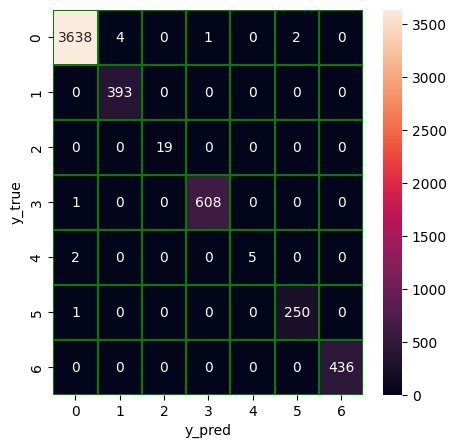

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lgbm)
f,ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.3,linecolor='green',fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

###XGB

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      1.00       393
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00       609
           4       1.00      0.71      0.83         7
           5       0.99      1.00      0.99       251
           6       1.00      1.00      1.00       436

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.97      5360
weighted avg       1.00      1.00      1.00      5360



In [ ]:
print('F1 score of XGBoost for each type of attack: ',str(f1_score(y_test,y_pred,average=None)))
print('Average F1 score of XGboost: ',str(f1_score(y_test,y_pred,average='weighted')))

F1 score of XGBoost for each type of attack:  [0.99849088 0.99619772 1.         0.99753492 0.83333333 0.99403579
 1.        ]
Average F1 score of XGboost:  0.9979179163735156


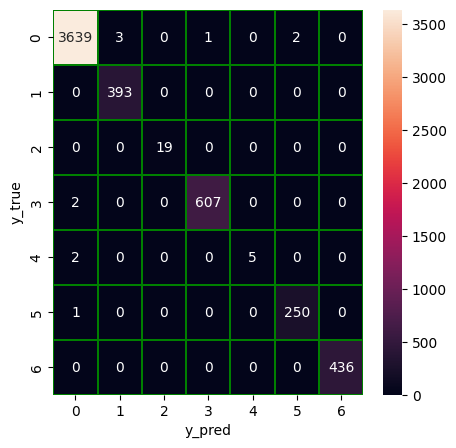

In [ ]:
cm=confusion_matrix(y_test,y_pred)
f,ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.3,linecolor='green',fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xgb_f1=f1_score(y_test,y_pred,average=None)

In [ ]:
xgb_f1.dtype

dtype('float64')

In [ ]:
xgb_f1

array([0.99849088, 0.99619772, 1.        , 0.99753492, 0.83333333,
       0.99403579, 1.        ])

###CatBoost

In [ ]:
print(classification_report(y_test,y_pred_cbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      1.00       393
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00       609
           4       1.00      0.71      0.83         7
           5       0.99      1.00      0.99       251
           6       1.00      1.00      1.00       436

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.97      5360
weighted avg       1.00      1.00      1.00      5360



In [ ]:
print('F1 score of Catboost for each type of attack: ',str(f1_score(y_test,y_pred_cbc,average=None)))
print('Average F1 score of Catboost: ',str(f1_score(y_test,y_pred_cbc,average='weighted')))

F1 score of Catboost for each type of attack:  [0.99835346 0.99746193 1.         0.99672131 0.83333333 0.99403579
 0.99885189]
Average F1 score of Catboost:  0.9977313267920159


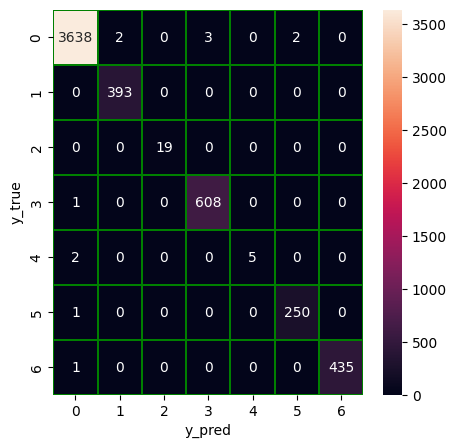

In [ ]:
cm=confusion_matrix(y_test,y_pred_cbc)
f,ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.3,linecolor='green',fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
cb_f1=f1_score(y_test,y_pred_cbc,average=None)

In [ ]:
model=[]

for i in range(len(lg_f1)):
    if(max(lg_f1[i],xgb_f1[i],cb_f1[i]))==lg_f1[i]:
        model.append(lbc)
    elif(max(lg_f1[i],xgb_f1[i],cb_f1[i]))==xgb_f1[i]:
        model.append(xbc)
    else: model.append(cbc)

In [ ]:
model

[XGBClassifier(alpha=0.9272506929926865, base_score=None, booster=None,
               callbacks=None, colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.897817264649498, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0.10954622044822832,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=0.23894424338682882,
               learning_rate=0.2883807528123632, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=118, n_jobs=None, ...),
 LGBMClassifier(colsample_bytree=0.9660911614345752,
                learning_rate=0.14420586855104273, max_depth=5,
                min_child_samples=12, num_leaves=64,

##LCCDE

In [ ]:
!pip install river


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
from river import stream
from statistics import mode

def LCCDE(X_test, y_test, m1, m2, m3):
    i = 0
    t = []
    m = []
    yt = []
    yp = []
    l = []
    pred_l = []
    pro_l = []

    for xi, yi in stream.iter_pandas(X_test, y_test):

        xi2 = np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1))
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1))
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1))
        y_pred3 = int(y_pred3[0])

        p1 = m1.predict_proba(xi2.reshape(1, -1))
        p2 = m2.predict_proba(xi2.reshape(1, -1))
        p3 = m3.predict_proba(xi2.reshape(1, -1))

        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)

        if y_pred1 == y_pred2 == y_pred3:
            y_pred = y_pred1

        elif y_pred1 != y_pred2 != y_pred3:
            if model[y_pred1] == m1:
                l.append(m1)
                pred_l.append(y_pred1)
                pro_l.append(y_pred_p1)

            if model[y_pred2] == m2:
                l.append(m2)
                pred_l.append(y_pred2)
                pro_l.append(y_pred_p2)

            if model[y_pred3] == m3:
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)

            if len(l) == 0:
                pro_l = [y_pred_p1, y_pred_p2, y_pred_p3]

            elif len(l) == 1:
                y_pred = pred_l[0]

            else:
                max_p = max(pro_l)
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                else:
                    y_pred = y_pred3

        else:
            n = mode([y_pred1, y_pred2, y_pred3])
            y_pred = model[n].predict(xi2.reshape(1, -1))
            y_pred = int(y_pred[0])

        yt.append(yi)
        yp.append(y_pred)

    return yt, yp


In [ ]:
yt, yp = LCCDE(x_test, y_test, m1 = lbc, m2 = xbc, m3 = cbc)

Streaming output truncated to the last 5000 lines.
<ipython-input-98-047b5540aa24>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-98-047b5540aa24>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-98-047b5540aa24>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-98-047b5540aa24>:22: DeprecationWarning: Conversion of an array with ndim > 0 t

In [ ]:
print(classification_report(yp,yt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       1.00      0.99      1.00       395
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00       608
           4       0.71      1.00      0.83         5
           5       1.00      0.99      0.99       252
           6       1.00      1.00      1.00       436

    accuracy                           1.00      5360
   macro avg       0.96      1.00      0.97      5360
weighted avg       1.00      1.00      1.00      5360



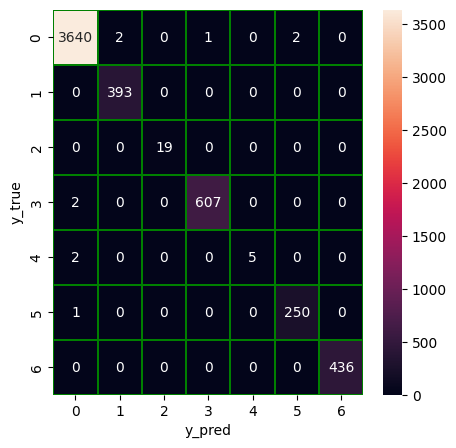

In [ ]:
cm=confusion_matrix(yt,yp)
f,ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.3,linecolor='green',fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('LCCDE F1 score: ',f1_score(yt,yp,average=None))
print('LCCDE average F1 score: ',f1_score(yt,yp,average='weighted'))

LCCDE F1 score:  [0.99862826 0.99746193 1.         0.99753492 0.83333333 0.99403579
 1.        ]
LCCDE average F1 score:  0.9981040337635679


**CONCLUSION** :  *We have successfully increased the f1 score of the previous model from 99.75 % to 99.81 %.*